### Analisis de base cartera vigente

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as mtick
# Cargar la base
df = pd.read_excel('Base Cartera Vigente Limpia.xlsx')


df = df[df['Edad al otorgamiento'] >= 0]
df = df[df['Plazo del credito'] > 0]

# Normalizar género (F/f, M/m)
df['Genero'] = df['Genero'].str.upper().str.strip()
df['Genero'] = df['Genero'].replace({'F': 'F', 'M': 'M', 'f': 'F', 'm': 'M'})

In [ ]:
montos = df['Monto Otorgado']
monto_max = montos.max()
monto_min = montos.min()
monto_median = montos.median()
monto_mean = montos.mean()
monto_std = montos.std()

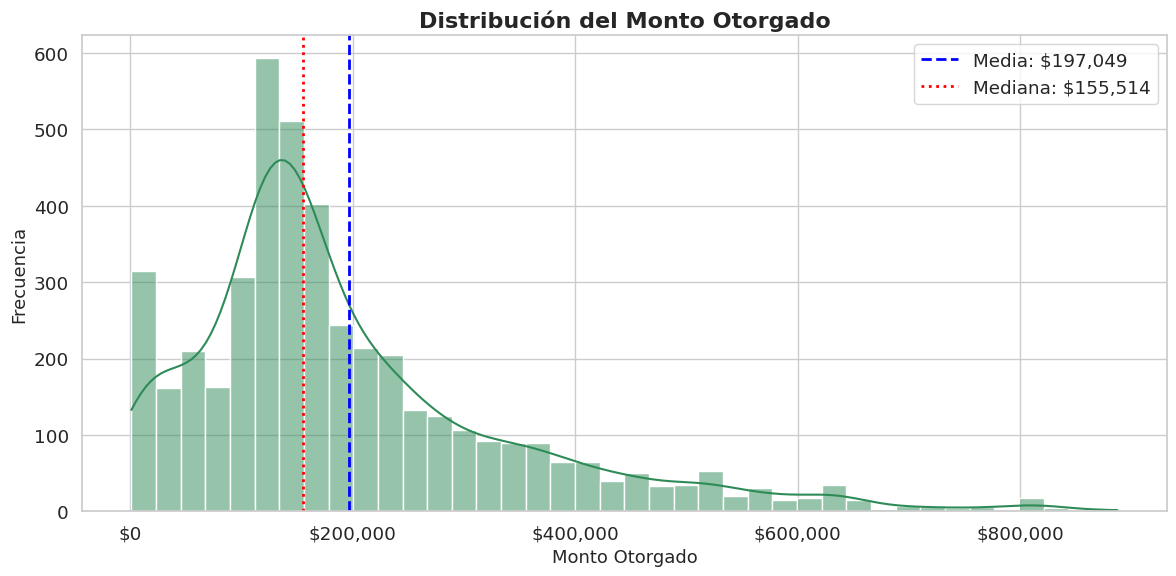

In [ ]:
# Estilo visual
sns.set(style="whitegrid", palette="deep", font_scale=1.2)

# Crear gráfico
plt.figure(figsize=(12, 6))
sns.histplot(montos, bins=40, kde=True, color="#2E8B57", edgecolor='white')

# Líneas de media y mediana
plt.axvline(monto_mean, color='blue', linestyle='--', linewidth=2, label=f'Media: ${monto_mean:,.0f}')
plt.axvline(monto_median, color='red', linestyle=':', linewidth=2, label=f'Mediana: ${monto_median:,.0f}')

# Títulos y etiquetas
plt.title("Distribución del Monto Otorgado", fontsize=16, weight='bold')
plt.xlabel("Monto Otorgado", fontsize=13)
plt.ylabel("Frecuencia", fontsize=13)
plt.legend()
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x):,}'))

# Guardar o mostrar
plt.tight_layout()
plt.savefig("grafico_monto_estetico.png", dpi=300)
plt.show()

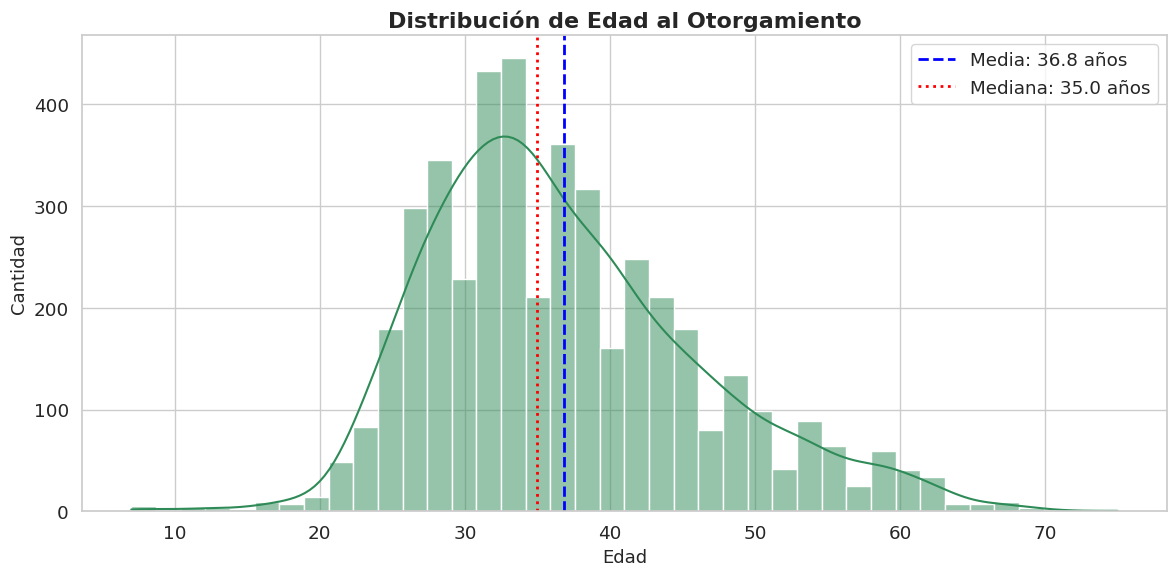

In [ ]:

# Edad
edad = df['Edad al otorgamiento']
edad_mean = edad.mean()
edad_median = edad.median()

# Estilo visual
sns.set(style="whitegrid", font_scale=1.2)

# Crear gráfico
plt.figure(figsize=(12, 6))
sns.histplot(edad, bins=40, kde=True, color="#2E8B57", edgecolor='white')

# Líneas de media y mediana
plt.axvline(edad_mean, color='blue', linestyle='--', linewidth=2, label=f'Media: {edad_mean:.1f} años')
plt.axvline(edad_median, color='red', linestyle=':', linewidth=2, label=f'Mediana: {edad_median:.1f} años')

# Títulos y etiquetas
plt.title("Distribución de Edad al Otorgamiento", fontsize=16, weight='bold')
plt.xlabel("Edad", fontsize=13)
plt.ylabel("Cantidad", fontsize=13)
plt.legend()

# Guardar o mostrar
plt.tight_layout()
plt.savefig("grafico_edad_estetico.png", dpi=300)
plt.show()

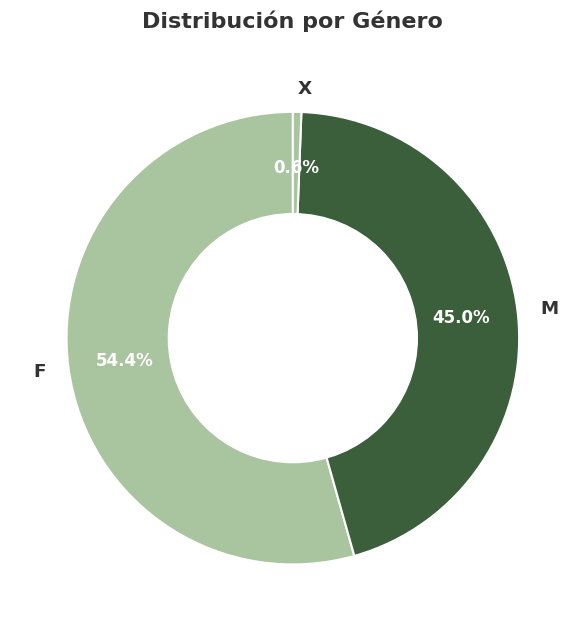

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer y limpiar datos
df = pd.read_excel('Base Cartera Vigente Limpia.xlsx')
df = df[df['Edad al otorgamiento'] >= 0]
df = df[df['Plazo del credito'] > 0]
df['Genero'] = df['Genero'].str.upper().str.strip()

# Agrupar
genero_counts = df['Genero'].value_counts()
labels = genero_counts.index
sizes = genero_counts.values
colors = ['#A9C5A0', '#3B5F3B']  # tonos elegantes de verde

# Estilo global
plt.rcParams.update({
    'font.size': 13,
    'text.color': '#333333',
    'axes.labelcolor': '#333333',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold'
})

# Gráfico
fig, ax = plt.subplots(figsize=(6.5, 6.5))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.75,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Estilo de texto
for text in texts:
    text.set_fontweight('bold')
    text.set_color('#333333')

for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color('white')
    autotext.set_size(12)

# Círculo central para efecto "donut"
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig.gca().add_artist(centre_circle)

# Título
plt.title('Distribución por Género', pad=20)

# Mostrar o guardar
plt.tight_layout()
plt.savefig('grafico_genero_premium.png', dpi=300)
plt.show()


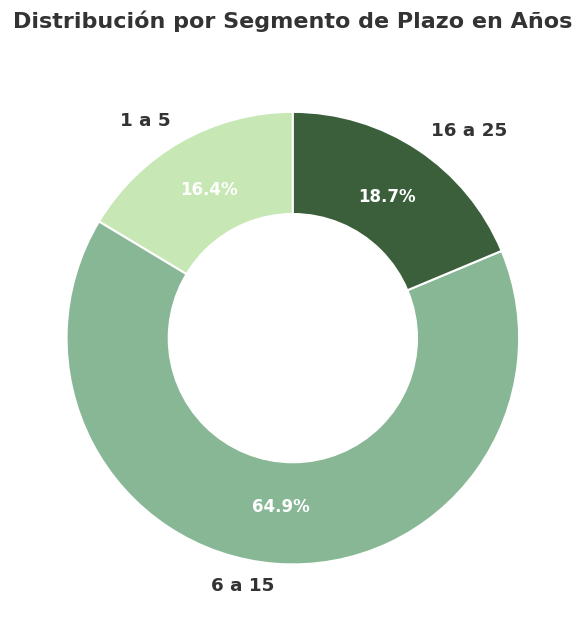

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Función para categorizar el plazo
def categorizar_plazo(plazo):
    if plazo <= 5:
        return '1 a 5'
    elif 6 <= plazo <= 15:
        return '6 a 15'
    else:
        return '16 a 25'

# Leer base y aplicar limpieza
df = pd.read_excel('Base Cartera Vigente Limpia.xlsx')
df = df[df['Edad al otorgamiento'] >= 0]
df = df[df['Plazo del credito'] > 0]
df['Segmento Plazo'] = df['Plazo del credito'].apply(categorizar_plazo)

# Agrupar y ordenar
segmento_counts = df['Segmento Plazo'].value_counts().reindex(['1 a 5', '6 a 15', '16 a 25'])

# Colores elegantes tono verde olivo
colors = ['#C7E8B4', '#88B796', '#3B5F3B']

# Estilo general
plt.rcParams.update({
    'font.size': 13,
    'text.color': '#333333',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold'
})

# Gráfico
fig, ax = plt.subplots(figsize=(6.5, 6.5))
wedges, texts, autotexts = ax.pie(
    segmento_counts,
    labels=segmento_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.75,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Ajustar textos
for text in texts:
    text.set_fontweight('bold')
    text.set_color('#333333')

for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color('white')
    autotext.set_size(12)

# Centro blanco para efecto donut
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig.gca().add_artist(centre_circle)

# Título
plt.title('Distribución por Segmento de Plazo en Años', pad=20)

# Exportar
plt.tight_layout()
plt.savefig("grafico_segmento_plazo_premium.png", dpi=300)
plt.show()


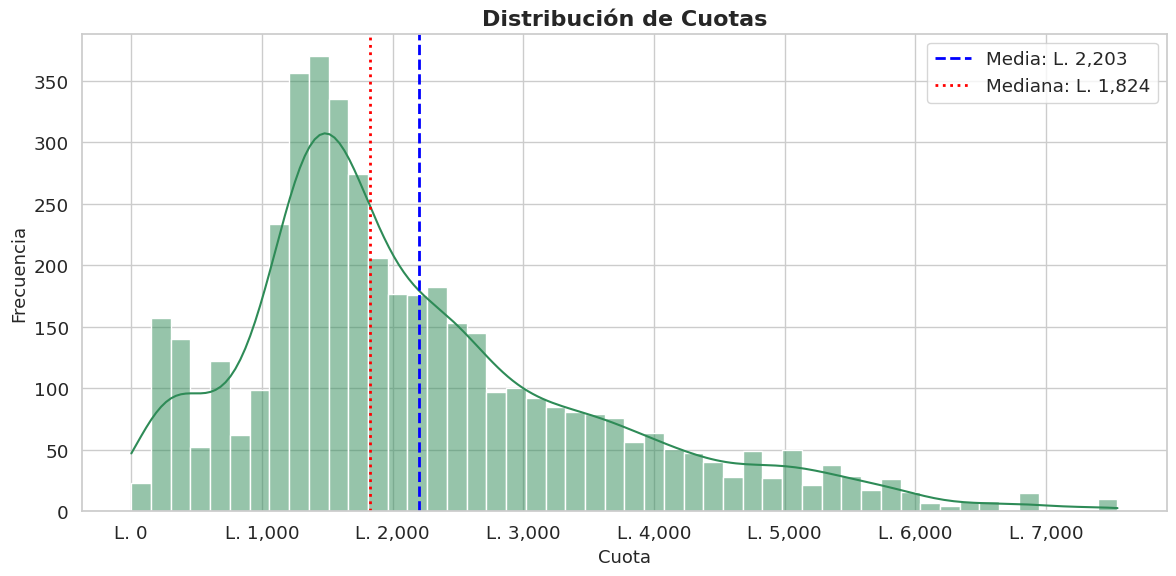

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Cargar y limpiar datos
df = pd.read_excel('Base Cartera Vigente Limpia.xlsx')
df = df[df['Edad al otorgamiento'] >= 0]
df = df[df['Plazo del credito'] > 0]
cuotas = df['Cuota'].dropna()

# Estadísticas
cuota_mean = cuotas.mean()
cuota_median = cuotas.median()

# Estilo visual
sns.set(style="whitegrid", font_scale=1.2)

# Crear gráfico
plt.figure(figsize=(12, 6))
sns.histplot(cuotas, bins=50, kde=True, color="#2E8B57", edgecolor='white')

# Líneas de media y mediana
plt.axvline(cuota_mean, color='blue', linestyle='--', linewidth=2, label=f'Media: L. {cuota_mean:,.0f}')
plt.axvline(cuota_median, color='red', linestyle=':', linewidth=2, label=f'Mediana: L. {cuota_median:,.0f}')

# Títulos y etiquetas
plt.title("Distribución de Cuotas", fontsize=16, weight='bold')
plt.xlabel("Cuota", fontsize=13)
plt.ylabel("Frecuencia", fontsize=13)
plt.legend()

# Eje X con símbolo de lempira
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'L. {int(x):,}'))

# Mostrar y guardar
plt.tight_layout()
plt.savefig("grafico_cuotas_estetico_lempira.png", dpi=300)
plt.show()


/tmp/ipython-input-33-3102940191.py:30: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



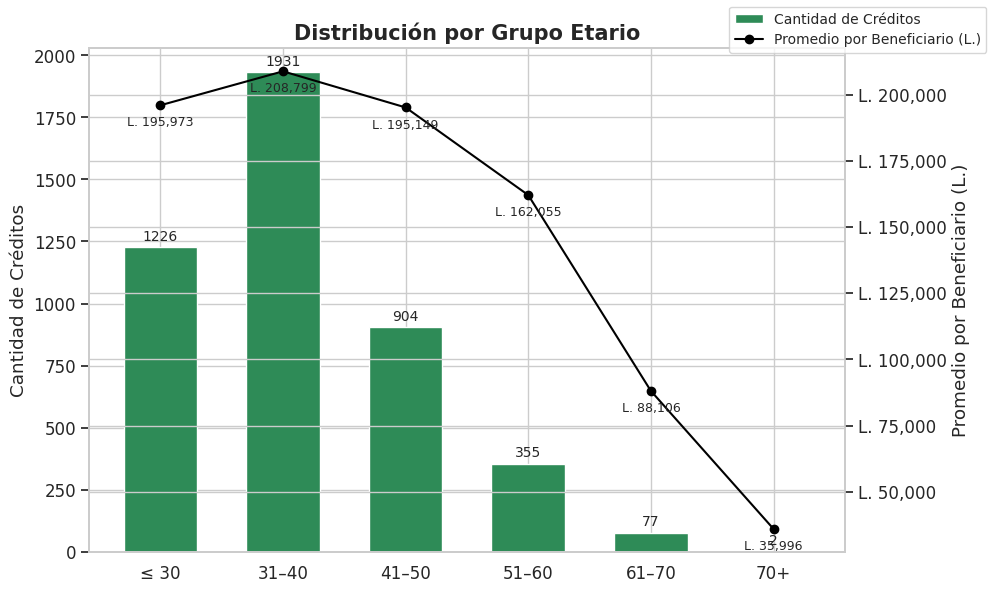

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Cargar base
df = pd.read_excel("/content/Base Cartera Vigente Limpia.xlsx", sheet_name='Sheet1')

# Limpiar columnas
df.columns = [col.strip().upper() for col in df.columns]

# Filtrar filas válidas
df = df[df['EDAD AL OTORGAMIENTO'] > 0]
df = df[df['MONTO OTORGADO'].notna()]
df = df[df['CUENTA'].notna()]

# Crear edad manualmente si falta fecha de nacimiento
df['FECHA OTORGAMIENTO'] = pd.to_datetime(df['FECHA OTORG.'], errors='coerce')
df['AÑO OTORGAMIENTO'] = df['FECHA OTORGAMIENTO'].dt.year
df['EDAD'] = df['AÑO OTORGAMIENTO'] - df['AÑO DE NACIMIENTO']

df = df[df['EDAD'] > 0]  # Excluir errores

# Agrupar por grupo etario
bins = [0, 30, 40, 50, 60, 70, 120]
labels = ['≤ 30', '31–40', '41–50', '51–60', '61–70', '70+']
df['GRUPO EDAD'] = pd.cut(df['EDAD'], bins=bins, labels=labels, right=True)

# Resumen por grupo etario
resumen_edad_cartera = df.groupby('GRUPO EDAD').agg(
    CANTIDAD=('CUENTA', 'count'),
    VALOR_TOTAL=('MONTO OTORGADO', 'sum')
).reset_index()
resumen_edad_cartera['PROMEDIO POR BENEFICIARIO'] = resumen_edad_cartera['VALOR_TOTAL'] / resumen_edad_cartera['CANTIDAD']

# ---------------------- GRÁFICO ----------------------
sns.set(style="whitegrid", font_scale=1.1)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Barras: Cantidad
bars = ax1.bar(
    resumen_edad_cartera['GRUPO EDAD'],
    resumen_edad_cartera['CANTIDAD'],
    color="#2E8B57",
    width=0.6,
    label='Cantidad de Créditos'
)

# Etiquetas en barras
for bar in bars:
    height = bar.get_height()
    ax1.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

# Línea: Promedio
ax2.plot(
    resumen_edad_cartera['GRUPO EDAD'],
    resumen_edad_cartera['PROMEDIO POR BENEFICIARIO'],
    color='black',
    marker='o',
    label='Promedio por Beneficiario (L.)'
)

# Etiquetas en puntos
for i, val in enumerate(resumen_edad_cartera['PROMEDIO POR BENEFICIARIO']):
    ax2.annotate(f"L. {val:,.0f}", xy=(i, val), xytext=(0, -15),
                 textcoords='offset points', ha='center', fontsize=9)

# Ejes y formato
ax1.set_ylabel('Cantidad de Créditos')
ax2.set_ylabel('Promedio por Beneficiario (L.)')
ax2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'L. {int(x):,}'))
plt.title('Distribución por Grupo Etario', fontsize=15, weight='bold')
ax1.set_xticks(range(len(resumen_edad_cartera)))
ax1.set_xticklabels(resumen_edad_cartera['GRUPO EDAD'])

# Leyenda
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles1 + handles2, labels1 + labels2, loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig("grafico_grupo_edad_creditos.png", dpi=300)
plt.show()


##### Analisis por tipo

In [ ]:
import pandas as pd

# Cargar archivo
df = pd.read_excel("/content/Cartera Vigente Simulacion.xlsx")

# Función de normalización
def normalizar_tipo_solucion(valor):
    if pd.isna(valor):
        return None
    valor = str(valor).strip().lower()

    # Normalizar a "Mejoras"
    if any(palabra in valor for palabra in [
        "mejora", "mejoramiento", "rehabilitacion", "terminacion","MEJ."
    ]):
        return "Mejoras"

    # Normalizar a "Condominio"
    elif "condominio" in valor:
        return "Condominio"

    # Normalizar a "Vivienda"
    elif any(palabra in valor for palabra in [
        "vivienda", "c.h.", "c.h ", "ch", "casa", "conjunto habitacional","Viv.","viv."
    ]):
        return "Vivienda"

    return None

# Aplicar normalización
df['TIPO DE SOLUCION NORMALIZADA'] = df['TIPO DE SOLUCION'].apply(normalizar_tipo_solucion)

# Eliminar filas sin categoría reconocida
df = df.dropna(subset=['TIPO DE SOLUCION NORMALIZADA'])


# Ver resumen
print(df['TIPO DE SOLUCION NORMALIZADA'].value_counts())


TIPO DE SOLUCION NORMALIZADA
Vivienda      2525
Mejoras        603
Condominio      35
Name: count, dtype: int64


In [ ]:
montos = df['Monto Otorgado']
monto_max = montos.max()
monto_min = montos.min()
monto_median = montos.median()
monto_mean = montos.mean()
monto_std = montos.std()

print("Monto máximo:", monto_max)
print("Monto mínimo:", monto_min)
print("Monto medio:", monto_mean)
print("Monto mediano:", monto_median)
print("Desviación estándar:", monto_std)

Monto máximo: 887383.5
Monto mínimo: 3333.91
Monto medio: 199236.23599114767
Monto mediano: 153336.04
Desviación estándar: 141460.00016749973


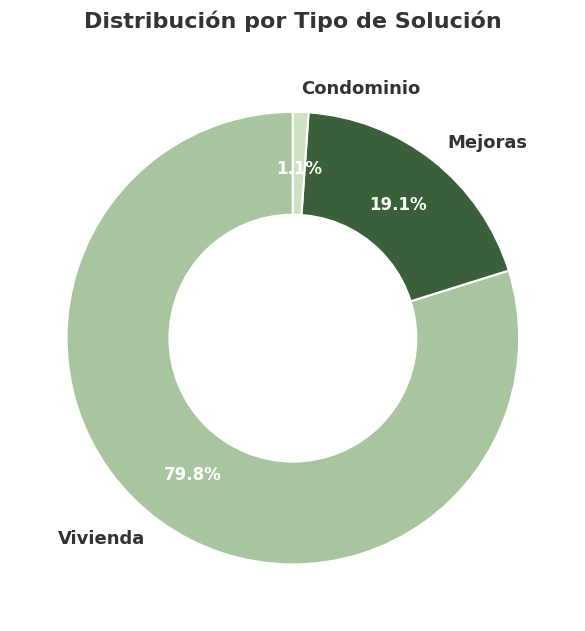

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Aplicar normalización ===
df['TIPO DE SOLUCION'] = df['TIPO DE SOLUCION'].astype(str).str.strip().str.upper()
df['TIPO DE SOLUCION NORMALIZADA'] = df['TIPO DE SOLUCION'].apply(normalizar_tipo_solucion)
df_limpio = df.dropna(subset=['TIPO DE SOLUCION NORMALIZADA'])

# === Agrupar por tipo de solución ===
tipo_counts = df_limpio['TIPO DE SOLUCION NORMALIZADA'].value_counts()
labels = tipo_counts.index
sizes = tipo_counts.values
colors = ['#A9C5A0', '#3B5F3B', '#CFE0C3']  # Tonos verdes elegantes

# === Estilo global ===
plt.rcParams.update({
    'font.size': 13,
    'text.color': '#333333',
    'axes.labelcolor': '#333333',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold'
})

# === Gráfico tipo donut ===
fig, ax = plt.subplots(figsize=(6.5, 6.5))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.75,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# === Estilo de textos ===
for text in texts:
    text.set_fontweight('bold')
    text.set_color('#333333')

for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color('white')
    autotext.set_size(12)

# === Efecto donut ===
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
fig.gca().add_artist(centre_circle)

# === Título ===
plt.title('Distribución por Tipo de Solución', pad=20)

# === Mostrar gráfico ===
plt.tight_layout()
plt.show()


/tmp/ipython-input-18-3072974220.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtrado, x='TIPO DE SOLUCION NORMALIZADA', y='Monto Otorgado',


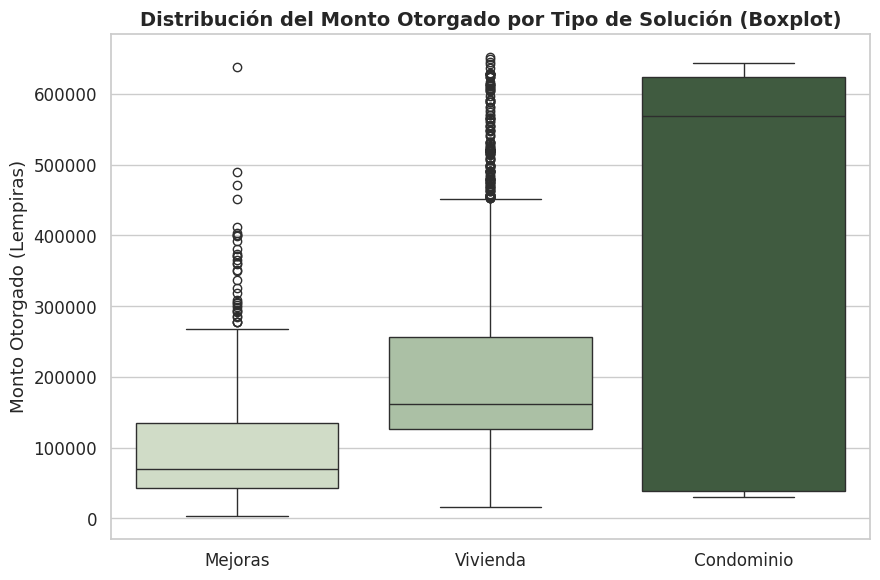

/tmp/ipython-input-18-3072974220.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtrado, x='TIPO DE SOLUCION NORMALIZADA', y='Monto Otorgado',


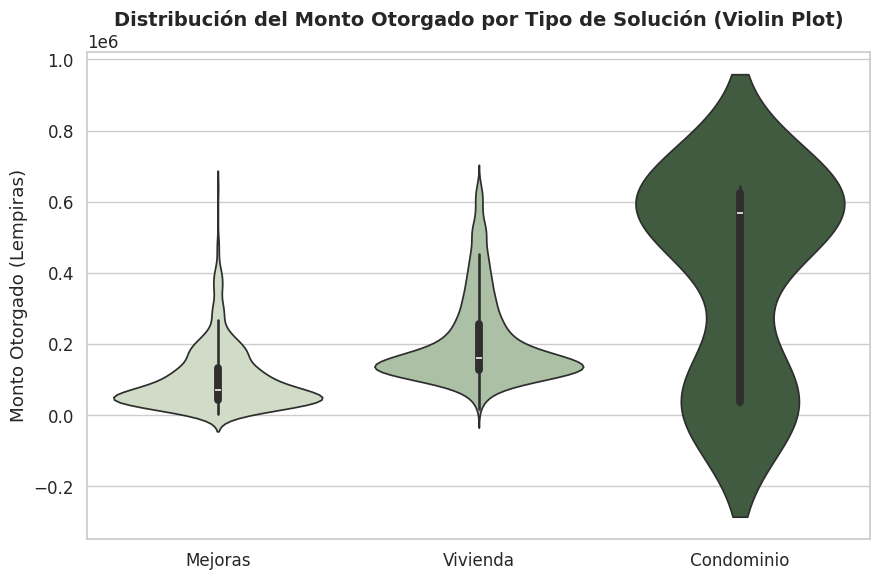

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer archivo
df = pd.read_excel("/content/Cartera Vigente Simulacion.xlsx")


# Limpieza
df.columns = [col.strip() for col in df.columns]
df['TIPO DE SOLUCION'] = df['TIPO DE SOLUCION'].astype(str).str.strip().str.upper()
df['TIPO DE SOLUCION NORMALIZADA'] = df['TIPO DE SOLUCION'].apply(normalizar_tipo_solucion)
df = df[df['Monto Otorgado'].notna() & df['Cuenta'].notna() & df['TIPO DE SOLUCION NORMALIZADA'].notna()]

# Filtrar extremos para mejor visualización
df_filtrado = df[df['Monto Otorgado'] < df['Monto Otorgado'].quantile(0.99)]  # quitar outliers del 1%

# === Gráfico Boxplot ===
plt.figure(figsize=(9, 6))
sns.boxplot(data=df_filtrado, x='TIPO DE SOLUCION NORMALIZADA', y='Monto Otorgado',
            palette=['#CFE0C3', '#A9C5A0', '#3B5F3B'])
plt.title("Distribución del Monto Otorgado por Tipo de Solución (Boxplot)", fontsize=14, weight='bold')
plt.ylabel("Monto Otorgado (Lempiras)")
plt.xlabel("")
plt.tight_layout()
plt.show()

# === Gráfico Violin Plot ===
plt.figure(figsize=(9, 6))
sns.violinplot(data=df_filtrado, x='TIPO DE SOLUCION NORMALIZADA', y='Monto Otorgado',
               palette=['#CFE0C3', '#A9C5A0', '#3B5F3B'])
plt.title("Distribución del Monto Otorgado por Tipo de Solución (Violin Plot)", fontsize=14, weight='bold')
plt.ylabel("Monto Otorgado (Lempiras)")
plt.xlabel("")
plt.tight_layout()
plt.show()


/tmp/ipython-input-23-3586983618.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby(['TIPO DE SOLUCION NORMALIZADA', 'RANGO_DIAS_MORA'])['Monto Otorgado'].mean().reset_index()


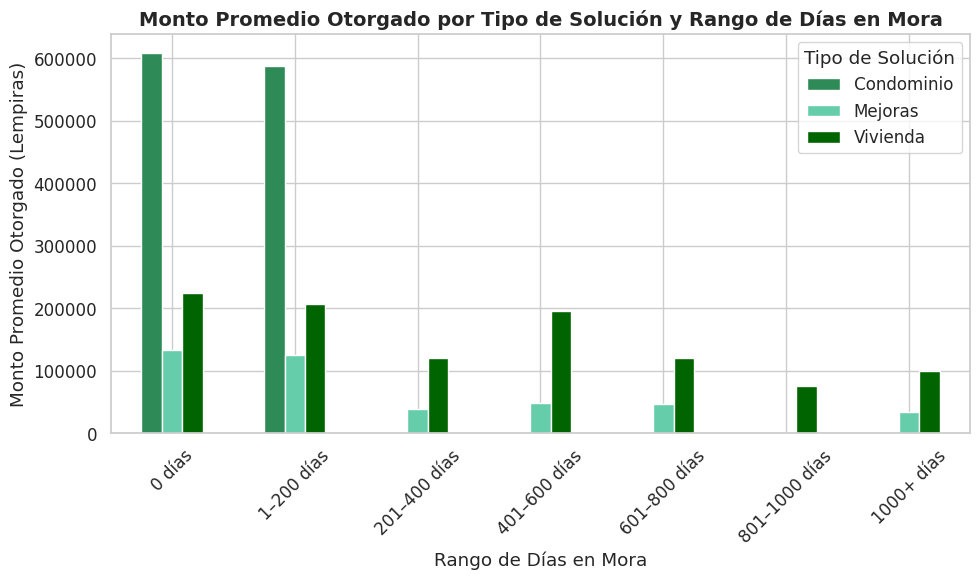

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Leer archivo ===
df = pd.read_excel("/content/Cartera Vigente Simulacion.xlsx")


# === Preparar datos ===
df.columns = [col.strip() for col in df.columns]
df['TIPO DE SOLUCION'] = df['TIPO DE SOLUCION'].astype(str).str.strip().str.upper()
df['TIPO DE SOLUCION NORMALIZADA'] = df['TIPO DE SOLUCION'].apply(normalizar_tipo_solucion)
df = df[df['Monto Otorgado'].notna() & df['Dias de atr.'].notna() & df['TIPO DE SOLUCION NORMALIZADA'].notna()]

# === Definir rangos de días en mora personalizados ===
bins = [-1, 0, 200, 400, 600, 800, 1000, float('inf')]
labels = ['0 días', '1–200 días', '201–400 días', '401–600 días', '601–800 días', '801–1000 días', '1000+ días']
df['RANGO_DIAS_MORA'] = pd.cut(df['Dias de atr.'], bins=bins, labels=labels)

# === Agrupar por tipo de solución y rango ===
resumen = df.groupby(['TIPO DE SOLUCION NORMALIZADA', 'RANGO_DIAS_MORA'])['Monto Otorgado'].mean().reset_index()
resumen = resumen.pivot(index='RANGO_DIAS_MORA', columns='TIPO DE SOLUCION NORMALIZADA', values='Monto Otorgado').fillna(0)

colores = {
    'Condominio': '#2E8B57',  # Verde fuerte
    'Mejoras': '#66CDAA',     # Verde medio
    'Vivienda': '#006400'     # Verde oscuro
}

# === Gráfico actualizado con colores más visibles ===
resumen.plot(kind='bar', figsize=(10, 6),
             color=[colores[col] for col in resumen.columns])

plt.title("Monto Promedio Otorgado por Tipo de Solución y Rango de Días en Mora", fontsize=14, weight='bold')
plt.ylabel("Monto Promedio Otorgado (Lempiras)")
plt.xlabel("Rango de Días en Mora")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Solución")
plt.tight_layout()
plt.show()

### Analisis de Siniestralidad


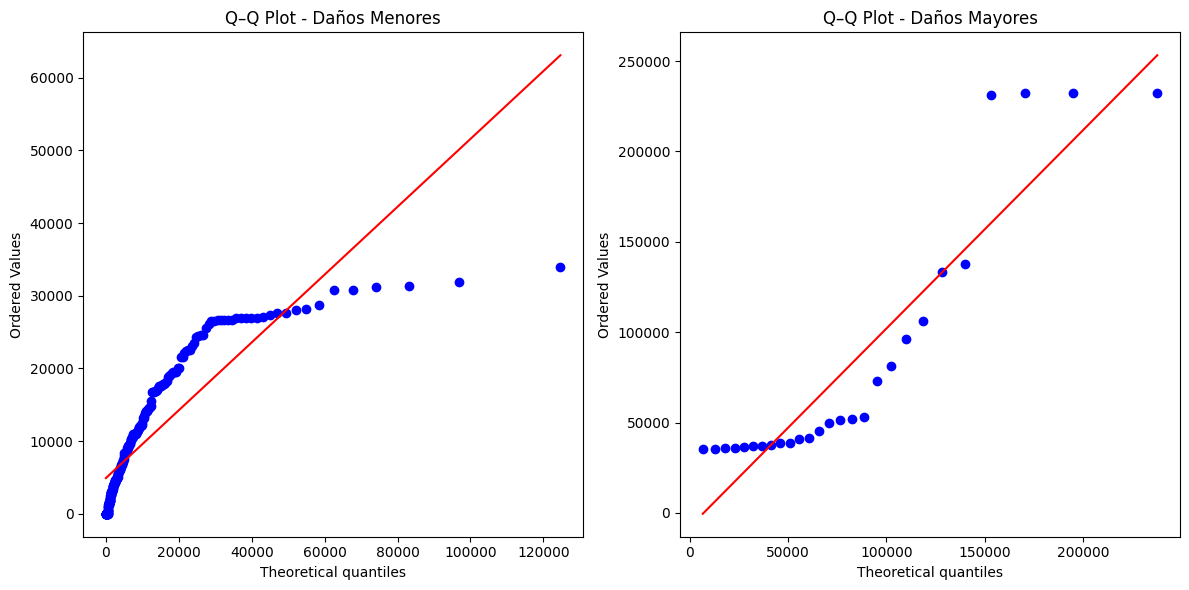

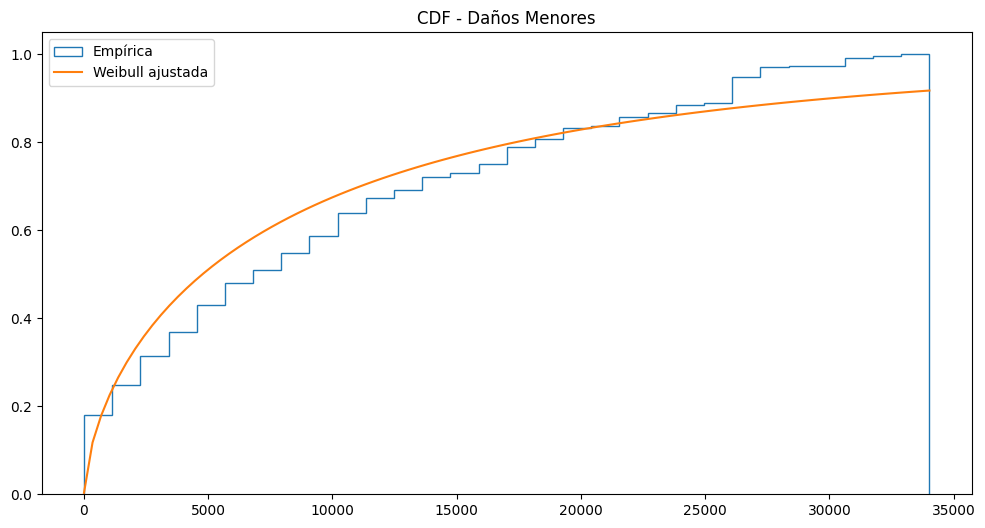

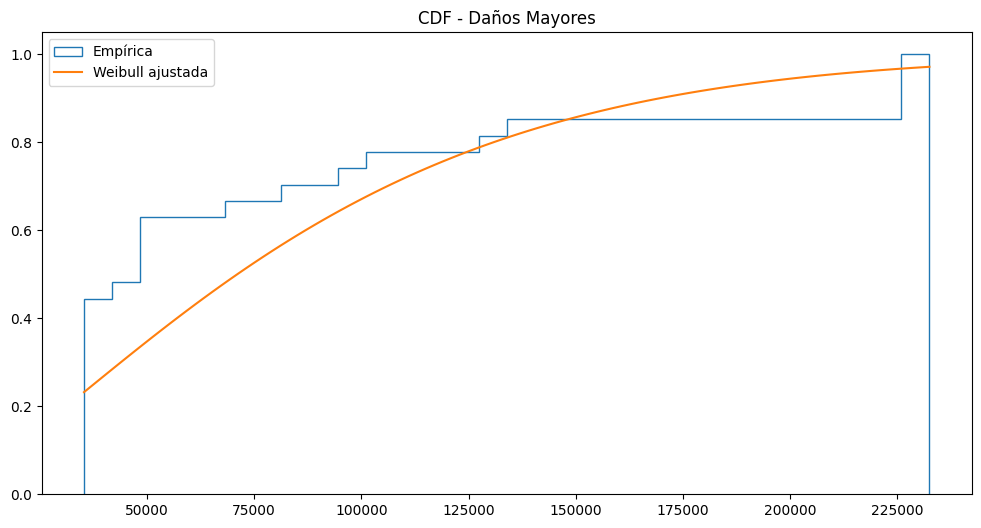

KS Menor: stat=0.1282, p=0.0008
KS Mayor: stat=0.2589, p=0.0439


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, probplot, kstest
import re

# --- Carga del CSV (maneja miles/decimales y guiones como NA) ---
df = pd.read_csv(
    "/content/Base Cobertura daños años 2018-2024.xlsx - CD (1).csv",
    thousands='.',           # 1.234.567
    decimal=',',             # 123,45
    na_values=['-', '–', '', 'NA', 'N/A', None]
)

# quita espacios “fantasma” en nombres de columnas
df.columns = df.columns.str.strip()

# --- Limpieza segura de moneda/importe ---
def clean_currency(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, (int, float)):
        return float(val)

    s = str(val).strip().replace('\u00a0', '')  # NBSP
    if s in {'-', '–', ''}:
        return np.nan

    # negativos en paréntesis: (1.234,56)
    neg = s.startswith('(') and s.endswith(')')
    if neg:
        s = s[1:-1]

    # deja solo dígitos y separadores
    s = re.sub(r'[^0-9,.-]', '', s)

    # convierte miles/decimal estilo ES -> float Python
    s = s.replace('.', '').replace(',', '.')
    try:
        v = float(s)
        return -v if neg else v
    except ValueError:
        return np.nan

col_src = 'VALOR PAGADO INDEMNIZACIÓN'  # ya sin el espacio inicial
df['VALOR PAGADO'] = df[col_src].apply(clean_currency)

# clasifica
df['TIPO_DAÑO'] = np.where(df['VALOR PAGADO'] <= 35000, 'Menor', 'Mayor')

# separa y limpia
danios_menores = pd.to_numeric(df.loc[df['TIPO_DAÑO']=='Menor','VALOR PAGADO'], errors='coerce').dropna().to_numpy()
danios_mayores = pd.to_numeric(df.loc[df['TIPO_DAÑO']=='Mayor','VALOR PAGADO'], errors='coerce').dropna().to_numpy()

# --- Ajuste Weibull ---
params_menor = weibull_min.fit(danios_menores, floc=0)
params_mayor = weibull_min.fit(danios_mayores, floc=0)

# --- Q–Q plots ---
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
probplot(danios_menores, dist=weibull_min(*params_menor), plot=axs[0])
axs[0].set_title('Q–Q Plot - Daños Menores')
probplot(danios_mayores, dist=weibull_min(*params_mayor), plot=axs[1])
axs[1].set_title('Q–Q Plot - Daños Mayores')
plt.tight_layout(); plt.show()

# --- CDFs ---
x_menor = np.linspace(danios_menores.min(), danios_menores.max(), 100)
x_mayor = np.linspace(danios_mayores.min(), danios_mayores.max(), 100)

plt.figure(figsize=(12,6))
plt.hist(danios_menores, bins=30, density=True, histtype='step', cumulative=True, label='Empírica')
plt.plot(x_menor, weibull_min.cdf(x_menor, *params_menor), label='Weibull ajustada')
plt.title("CDF - Daños Menores"); plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.hist(danios_mayores, bins=30, density=True, histtype='step', cumulative=True, label='Empírica')
plt.plot(x_mayor, weibull_min.cdf(x_mayor, *params_mayor), label='Weibull ajustada')
plt.title("CDF - Daños Mayores"); plt.legend()
plt.show()

# --- KS test ---
ks_menor = kstest(danios_menores, 'weibull_min', args=params_menor)
ks_mayor = kstest(danios_mayores, 'weibull_min', args=params_mayor)
print(f"KS Menor: stat={ks_menor.statistic:.4f}, p={ks_menor.pvalue:.4f}")
print(f"KS Mayor: stat={ks_mayor.statistic:.4f}, p={ks_mayor.pvalue:.4f}")


N observaciones (mayores): 27


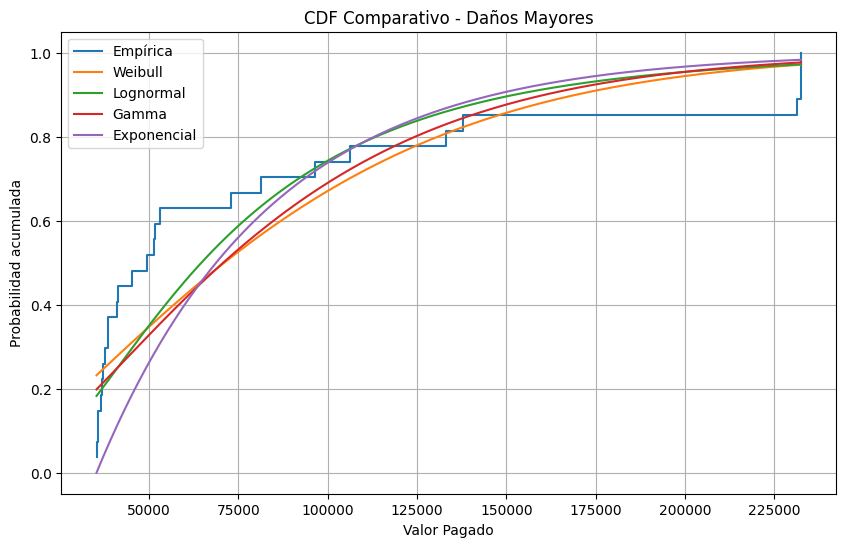

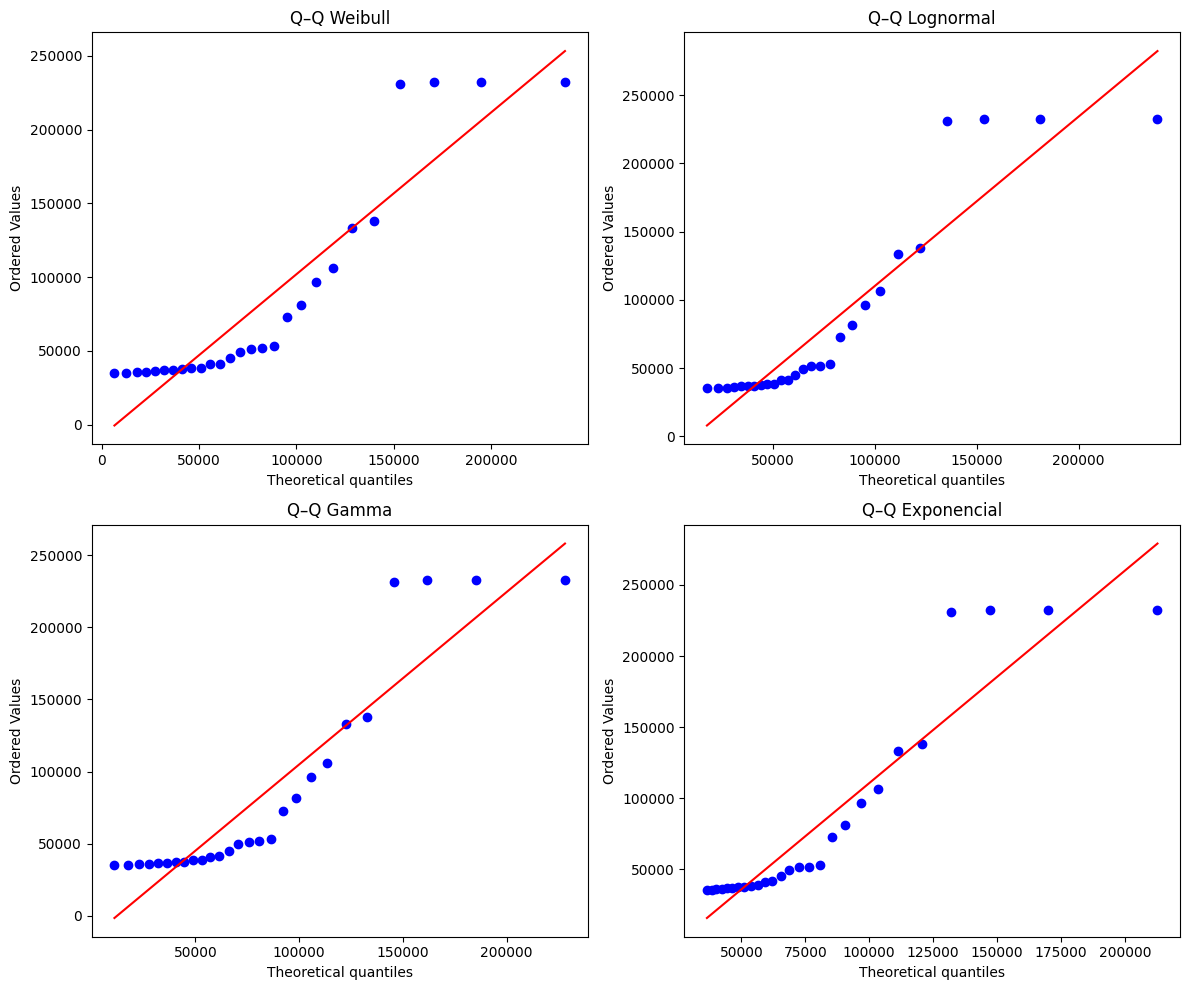

Weibull: KS=0.2589, p=0.0439
Lognormal: KS=0.2460, p=0.0634
Gamma: KS=0.2750, p=0.0270
Exponencial: KS=0.3265, p=0.0046


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, lognorm, gamma, expon, kstest, probplot
import re

# --- Carga del CSV: maneja miles/decimales y guiones como NA ---
df = pd.read_csv(
    "/content/Base Cobertura daños años 2018-2024.xlsx - CD (1).csv",
    thousands='.',              # "1.234.567"
    decimal=',',                # "123,45"
    na_values=['-', '–', '', 'NA', 'N/A', None]
)

# Normaliza encabezados (hay uno con espacio inicial)
df.columns = df.columns.str.strip()

# --- Limpieza segura por si quedaron strings con símbolos ---
def clean_currency(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, (int, float, np.number)):
        return float(val)
    s = str(val).strip().replace('\u00a0', '')  # NBSP
    if s in {'-', '–', ''}:
        return np.nan
    # negativos con paréntesis: (1.234,56)
    neg = s.startswith('(') and s.endswith(')')
    if neg:
        s = s[1:-1]
    s = re.sub(r'[^0-9,.-]', '', s)            # deja dígitos y separadores
    s = s.replace('.', '').replace(',', '.')   # ES -> float
    try:
        v = float(s)
        return -v if neg else v
    except ValueError:
        return np.nan

# Columna origen (ya sin espacio inicial)
col_src = 'VALOR PAGADO INDEMNIZACIÓN'
df['VALOR PAGADO'] = df[col_src].apply(clean_currency)

# Clasificación
df['TIPO_DAÑO'] = np.where(df['VALOR PAGADO'] <= 35000, 'Menor', 'Mayor')

# --- Conjunto de 'Mayores': solo valores positivos finitos ---
danios_mayores = pd.to_numeric(
    df.loc[df['TIPO_DAÑO']=='Mayor','VALOR PAGADO'],
    errors='coerce'
).dropna()
danios_mayores = danios_mayores[danios_mayores > 0].to_numpy()

# Si quedaran muy pocos datos, avisar
print(f"N observaciones (mayores): {danios_mayores.size}")

# --- Ajuste de distribuciones ---
params_weibull = weibull_min.fit(danios_mayores, floc=0)
params_lognorm = lognorm.fit(danios_mayores, floc=0)
params_gamma  = gamma.fit(danios_mayores, floc=0)
params_expon  = expon.fit(danios_mayores)  # expon no fuerza loc=0

# --- CDF comparativa ---
x = np.linspace(danios_mayores.min(), danios_mayores.max(), 200)
sorted_data = np.sort(danios_mayores)
empirical_cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)

plt.figure(figsize=(10,6))
plt.plot(sorted_data, empirical_cdf, label="Empírica", drawstyle='steps-post')
plt.plot(x, weibull_min.cdf(x, *params_weibull), label="Weibull")
plt.plot(x, lognorm.cdf(x, *params_lognorm), label="Lognormal")
plt.plot(x, gamma.cdf(x, *params_gamma), label="Gamma")
plt.plot(x, expon.cdf(x, *params_expon), label="Exponencial")
plt.title("CDF Comparativo - Daños Mayores")
plt.xlabel("Valor Pagado"); plt.ylabel("Probabilidad acumulada")
plt.legend(); plt.grid(True); plt.show()

# --- Q–Q plots (con distribuciones 'freezadas') ---
fig, axs = plt.subplots(2, 2, figsize=(12,10))
probplot(danios_mayores, dist=weibull_min(*params_weibull), plot=axs[0,0]); axs[0,0].set_title('Q–Q Weibull')
probplot(danios_mayores, dist=lognorm(*params_lognorm),    plot=axs[0,1]); axs[0,1].set_title('Q–Q Lognormal')
probplot(danios_mayores, dist=gamma(*params_gamma),        plot=axs[1,0]); axs[1,0].set_title('Q–Q Gamma')
probplot(danios_mayores, dist=expon(*params_expon),        plot=axs[1,1]); axs[1,1].set_title('Q–Q Exponencial')
plt.tight_layout(); plt.show()

# --- KS tests ---
ks_results = {
    "Weibull":     kstest(danios_mayores, 'weibull_min', args=params_weibull),
    "Lognormal":   kstest(danios_mayores, 'lognorm',     args=params_lognorm),
    "Gamma":       kstest(danios_mayores, 'gamma',       args=params_gamma),
    "Exponencial": kstest(danios_mayores, 'expon',       args=params_expon),
}
for name, r in ks_results.items():
    print(f"{name}: KS={r.statistic:.4f}, p={r.pvalue:.4f}")


Resultados (incluyendo gasto administrativo 16.17%):
Promedio: L. 773,050.51  |  Tasa Técnica ≈ 0.835 ‰
P70: L. 888,428.20  |  Tasa Técnica ≈ 0.960 ‰
P90: L. 1,152,184.58  |  Tasa Técnica ≈ 1.245 ‰
P95: L. 1,273,415.09  |  Tasa Técnica ≈ 1.376 ‰
P99: L. 1,550,508.86  |  Tasa Técnica ≈ 1.675 ‰
P99.5: L. 1,631,404.95  |  Tasa Técnica ≈ 1.763 ‰
Desviación estándar: L. 277,498.91  |  Tasa Técnica (STD) ≈ 0.300 ‰


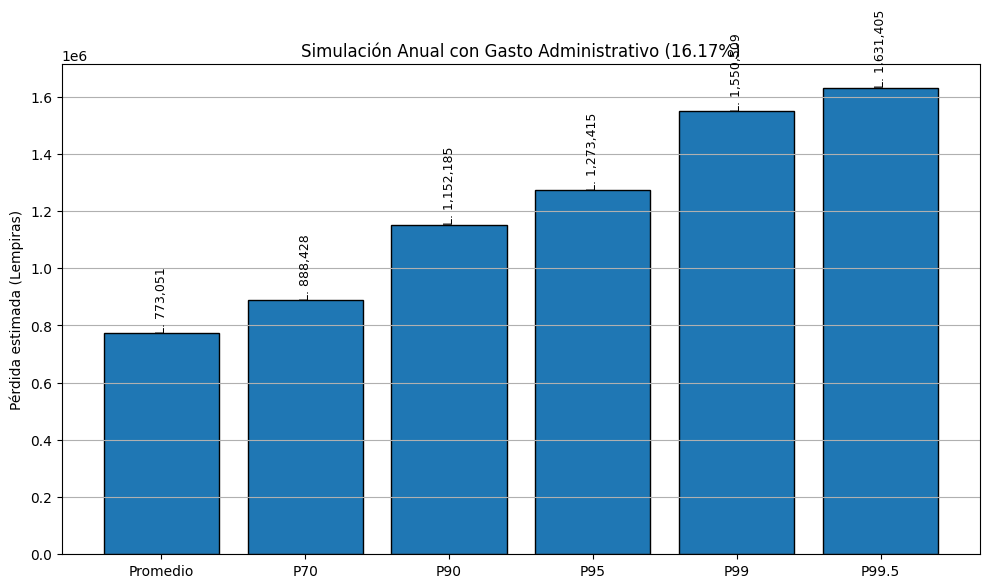

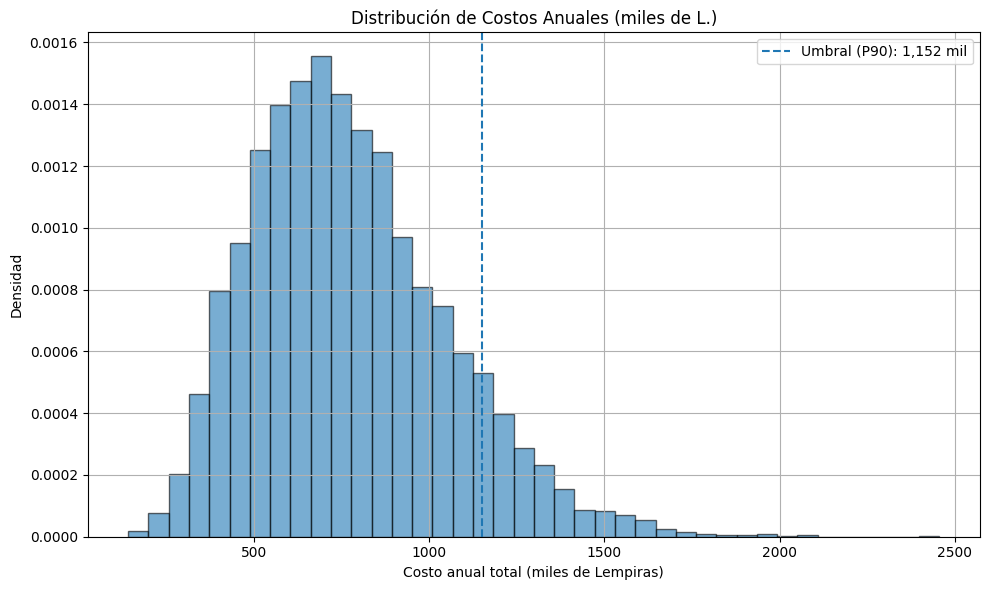

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
import re

# ----- Datos base -----
familias_por_ano = {2018:5525, 2019:5308, 2020:5172, 2021:4948, 2022:4771, 2023:4532, 2024:4496}
siniestros_menores = [17, 17, 23, 30, 14, 32, 46]
siniestros_mayores = [3, 5, 8, 5, 7, 11, 16]

familias_actuales = 4496
monto_asegurado_promedio = 205_834
num_simulaciones = 10_000
gasto_admin = 0.1617

# Frecuencias promedio (Poisson)
lam_menor = sum(siniestros_menores) / len(siniestros_menores)
lam_mayor = sum(siniestros_mayores) / len(siniestros_mayores)

df = pd.read_csv(
    "/content/Base Cobertura daños años 2018-2024.xlsx - CD (1).csv",
    thousands='.',           # 1.234.567
    decimal=',',             # 123,45
    na_values=['-', '–', '', 'NA', 'N/A', None]
)

df.columns = df.columns.str.strip()

# Limpieza robusta de importes
def clean_currency(val):
    if pd.isna(val):
        return np.nan
    if isinstance(val, (int, float, np.number)):
        return float(val)

    s = str(val).strip().replace('\u00a0', '')  # NBSP
    if s in {'-', '–', ''}:
        return np.nan

    # negativos con paréntesis: (1.234,56)
    neg = s.startswith('(') and s.endswith(')')
    if neg:
        s = s[1:-1]

    # deja solo dígitos y separadores . , -
    s = re.sub(r'[^0-9,.-]', '', s)
    # convierte formato ES -> float
    s = s.replace('.', '').replace(',', '.')
    try:
        v = float(s)
        return -v if neg else v
    except ValueError:
        return np.nan

col_src = 'VALOR PAGADO INDEMNIZACIÓN'  # ya sin espacio inicial
df['VALOR PAGADO'] = df[col_src].apply(clean_currency)

# Clasificación (ajusta el umbral si quieres)
df['TIPO_DAÑO'] = np.where(df['VALOR PAGADO'] <= 25_000, 'Menor', 'Mayor')

# Series limpias
danios_menores = pd.to_numeric(df.loc[df['TIPO_DAÑO']=='Menor','VALOR PAGADO'], errors='coerce').dropna()
danios_menores = danios_menores[danios_menores > 0].to_numpy()

danios_mayores = pd.to_numeric(df.loc[df['TIPO_DAÑO']=='Mayor','VALOR PAGADO'], errors='coerce').dropna()
danios_mayores = danios_mayores[danios_mayores > 0].to_numpy()

# Ajuste Weibull a menores
params_menor = weibull_min.fit(danios_menores, floc=0)

# ----- Simulación -----
rng = np.random.default_rng(123)

total_losses = np.empty(num_simulaciones)
for i in range(num_simulaciones):
    k_menor = rng.poisson(lam_menor)
    k_mayor = rng.poisson(lam_mayor)

    s_menor = weibull_min.rvs(*params_menor, size=k_menor, random_state=rng).sum() if k_menor > 0 else 0.0
    s_mayor = rng.choice(danios_mayores, size=k_mayor, replace=True).sum() if k_mayor > 0 else 0.0

    total_losses[i] = (s_menor + s_mayor) * (1 + gasto_admin)

percentiles = {
    "Promedio": np.mean(total_losses),
    "P70": np.percentile(total_losses, 70),
    "P90": np.percentile(total_losses, 90),
    "P95": np.percentile(total_losses, 95),
    "P99": np.percentile(total_losses, 99),
    "P99.5": np.percentile(total_losses, 99.5),
    "Desviación estándar": np.std(total_losses, ddof=1)
}

print("Resultados (incluyendo gasto administrativo 16.17%):")
den = familias_actuales * monto_asegurado_promedio
for key, val in percentiles.items():
    tasa = val / den * 1000  # ‰
    suf = " (STD)" if "Desviación" in key else ""
    print(f"{key}: L. {val:,.2f}  |  Tasa Técnica{suf} ≈ {tasa:.3f} ‰")

# ----- Gráficos -----
plt.figure(figsize=(10,6))
labels = [k for k in percentiles.keys() if "Desviación" not in k]
values = [percentiles[k] for k in labels]
bars = plt.bar(labels, values, edgecolor='black')
plt.ylabel("Pérdida estimada (Lempiras)")
plt.title("Simulación Anual con Gasto Administrativo (16.17%)")
for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h, f"L. {h:,.0f}", ha='center', va='bottom', fontsize=9, rotation=90)
plt.grid(axis='y'); plt.tight_layout(); plt.show()

plt.figure(figsize=(10,6))
plt.hist(total_losses/1000, bins=40, density=True, alpha=0.6, edgecolor='black')
p90 = percentiles["P90"]/1000
plt.axvline(p90, linestyle='--', label=f"Umbral (P90): {p90:,.0f} mil")
plt.title("Distribución de Costos Anuales (miles de L.)")
plt.xlabel("Costo anual total (miles de Lempiras)")
plt.ylabel("Densidad"); plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()


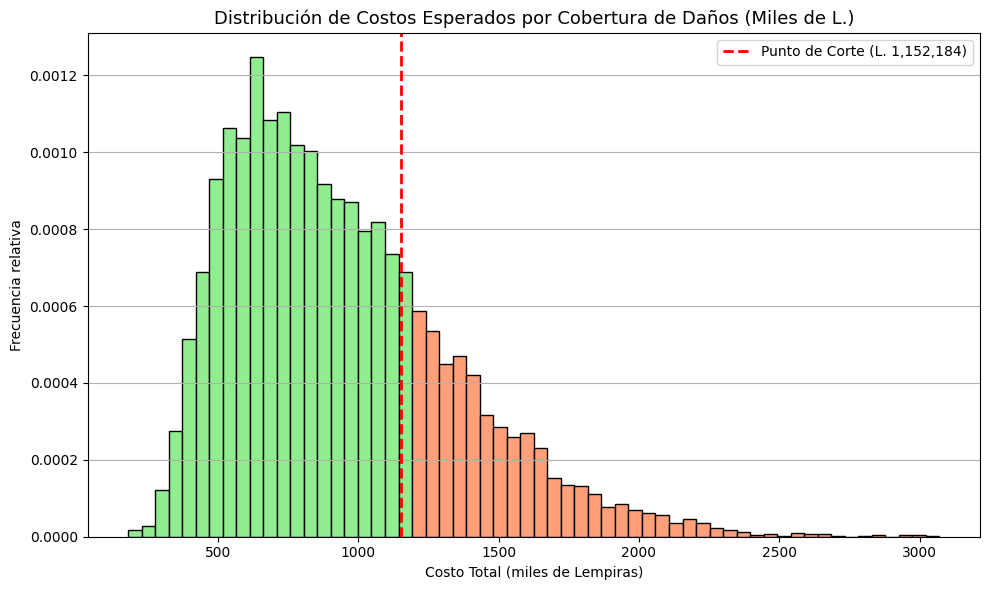

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
import pandas as pd

# Parámetros generales
familias_actuales = 4496
monto_asegurado_promedio = 205000
num_simulaciones = 10000
gasto_admin = 0.1617  # 16.17%

# Frecuencias observadas
siniestros_menores = [17, 17, 23, 30, 14, 32, 46]
siniestros_mayores = [3, 5, 8, 5, 7, 11, 16]
frecuencia_menor = np.mean(siniestros_menores)
frecuencia_mayor = np.mean(siniestros_mayores)

# Leer y limpiar la base
df = pd.read_csv("/content/Base Cobertura daños años 2018-2024.xlsx - CD (1).csv")

def clean_currency(val):
    if isinstance(val, str):
        return float(val.replace('.', '').replace(',', '.').strip())
    return val

df['VALOR PAGADO'] = df[' VALOR PAGADO INDEMNIZACIÓN'].apply(clean_currency)
df['TIPO_DAÑO'] = df['VALOR PAGADO'].apply(lambda x: 'Menor' if x <= 25000 else 'Mayor')

danios_menores = df[df['TIPO_DAÑO'] == 'Menor']['VALOR PAGADO'].dropna()
danios_mayores = df[df['TIPO_DAÑO'] == 'Mayor']['VALOR PAGADO'].dropna()

# Ajustar distribución Weibull
params_menor = weibull_min.fit(danios_menores, floc=0)

# Simulación Monte Carlo
total_losses = []
for _ in range(num_simulaciones):
    k_menor = np.random.poisson(frecuencia_menor)
    k_mayor = np.random.poisson(frecuencia_mayor)

    suma_menor = weibull_min.rvs(*params_menor, size=k_menor).sum() if k_menor > 0 else 0
    suma_mayor = np.random.choice(danios_mayores, size=k_mayor, replace=True).sum() if k_mayor > 0 else 0

    total = (suma_menor + suma_mayor) * (1 + gasto_admin)
    total_losses.append(total)

# Convertir a miles para graficar
losses_k = np.array(total_losses) / 1000

# Definir el umbral exacto
umbral = 1152184.5 / 1000  # en miles de Lempiras

# Crear el histograma
fig, ax = plt.subplots(figsize=(10, 6))
counts, bins, patches = ax.hist(losses_k, bins=60, density=True, edgecolor='black')

# Colorear las barras
for patch, bin_left in zip(patches, bins[:-1]):
    if bin_left <= umbral:
        patch.set_facecolor('lightgreen')
    else:
        patch.set_facecolor('lightsalmon')

# Línea del umbral
plt.axvline(umbral, color='red', linestyle='--', linewidth=2, label=f'Punto de Corte (L. {umbral*1000:,.0f})')

# Estética
plt.title("Distribución de Costos Esperados por Cobertura de Daños (Miles de L.)", fontsize=13)
plt.xlabel("Costo Total (miles de Lempiras)")
plt.ylabel("Frecuencia relativa")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Simulacion con todos los años y con seguro

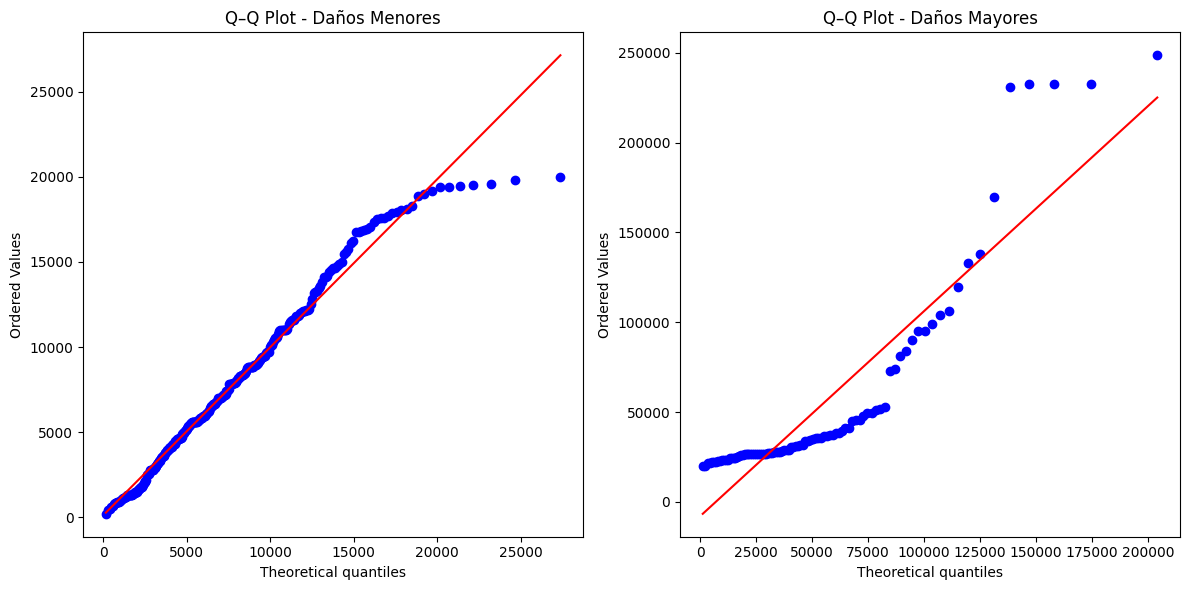

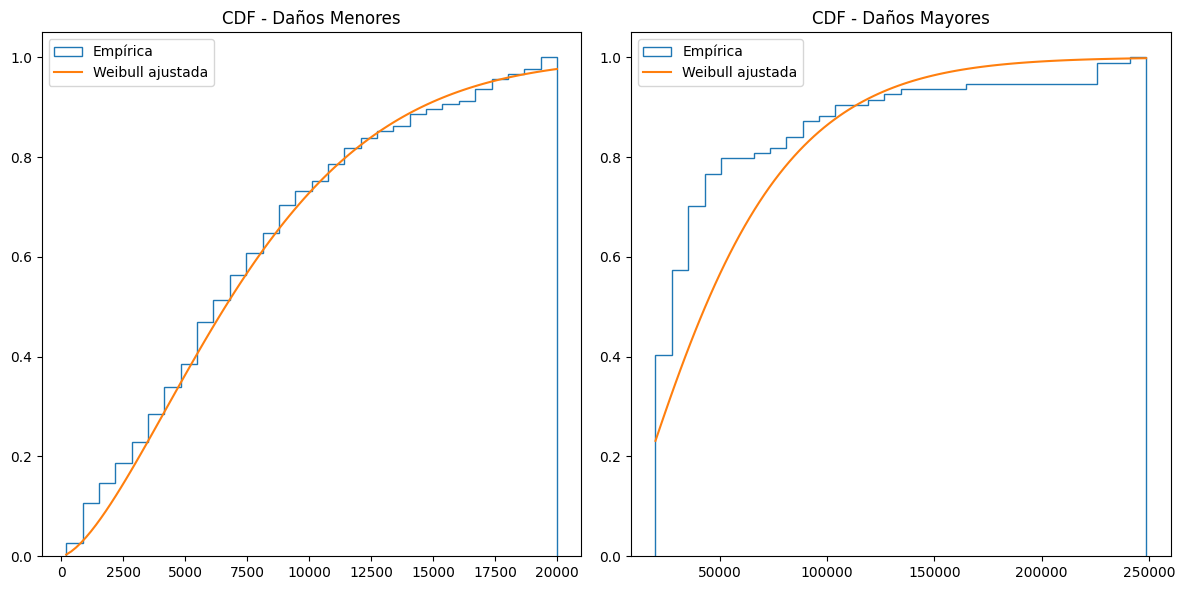

Kolmogorov–Smirnov Test - Daños Menores
KS Statistic: 0.0428, p-value: 0.6292

Kolmogorov–Smirnov Test - Daños Mayores
KS Statistic: 0.2313, p-value: 0.0001


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, probplot, kstest

# Cargar los datos
df = pd.read_excel("/content/Simulacion 2011-2024 Daños.xlsx")

# Limpieza de valores
def clean_currency(val):
    if isinstance(val, str):
        return float(val.replace('.', '').replace(',', '.').strip())
    return val

df['VALOR PAGADO'] = df['VALOR PAGADO INDEMNIZACIÓN'].apply(clean_currency)
df['TIPO_DAÑO'] = df['VALOR PAGADO'].apply(lambda x: 'Menor' if x <= 25000 else 'Mayor')

# Separar daños
danios_menores = df[df['TIPO_DAÑO'] == 'Menor']['VALOR PAGADO'].dropna()
danios_menores = danios_menores[np.isfinite(danios_menores)]

danios_mayores = df[df['TIPO_DAÑO'] == 'Mayor']['VALOR PAGADO'].dropna()
danios_mayores = danios_mayores[np.isfinite(danios_mayores)]

# Ajustar Weibull
params_menor = weibull_min.fit(danios_menores, floc=0)
params_mayor = weibull_min.fit(danios_mayores, floc=0)

# Q–Q plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
probplot(danios_menores, dist=weibull_min(*params_menor), plot=axs[0])
axs[0].set_title('Q–Q Plot - Daños Menores')

probplot(danios_mayores, dist=weibull_min(*params_mayor), plot=axs[1])
axs[1].set_title('Q–Q Plot - Daños Mayores')
plt.tight_layout()
plt.show()

# CDF acumulada
x_menor = np.linspace(min(danios_menores), max(danios_menores), 100)
x_mayor = np.linspace(min(danios_mayores), max(danios_mayores), 100)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(danios_menores, bins=30, density=True, histtype='step', cumulative=True, label='Empírica')
plt.plot(x_menor, weibull_min.cdf(x_menor, *params_menor), label='Weibull ajustada')
plt.title("CDF - Daños Menores")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(danios_mayores, bins=30, density=True, histtype='step', cumulative=True, label='Empírica')
plt.plot(x_mayor, weibull_min.cdf(x_mayor, *params_mayor), label='Weibull ajustada')
plt.title("CDF - Daños Mayores")
plt.legend()
plt.tight_layout()
plt.show()

# Test de Kolmogorov-Smirnov
ks_menor = kstest(danios_menores, 'weibull_min', args=params_menor)
ks_mayor = kstest(danios_mayores, 'weibull_min', args=params_mayor)

print("Kolmogorov–Smirnov Test - Daños Menores")
print(f"KS Statistic: {ks_menor.statistic:.4f}, p-value: {ks_menor.pvalue:.4f}")
print()
print("Kolmogorov–Smirnov Test - Daños Mayores")
print(f"KS Statistic: {ks_mayor.statistic:.4f}, p-value: {ks_mayor.pvalue:.4f}")


Resultados (incluyen gasto administrativo 16.17% + seguro):
Promedio: L. 974,059.67  |  Tasa Técnica ≈ 0.852 ‰
P70: L. 1,132,205.17  |  Tasa Técnica ≈ 0.991 ‰
P90: L. 1,461,512.96  |  Tasa Técnica ≈ 1.279 ‰
P95: L. 1,633,494.09  |  Tasa Técnica ≈ 1.429 ‰
P99: L. 1,991,770.63  |  Tasa Técnica ≈ 1.743 ‰
P99.5: L. 2,162,388.02  |  Tasa Técnica ≈ 1.892 ‰
Desviación estándar: L. 381,101.35  |  Tasa Técnica (STD) ≈ 0.333 ‰


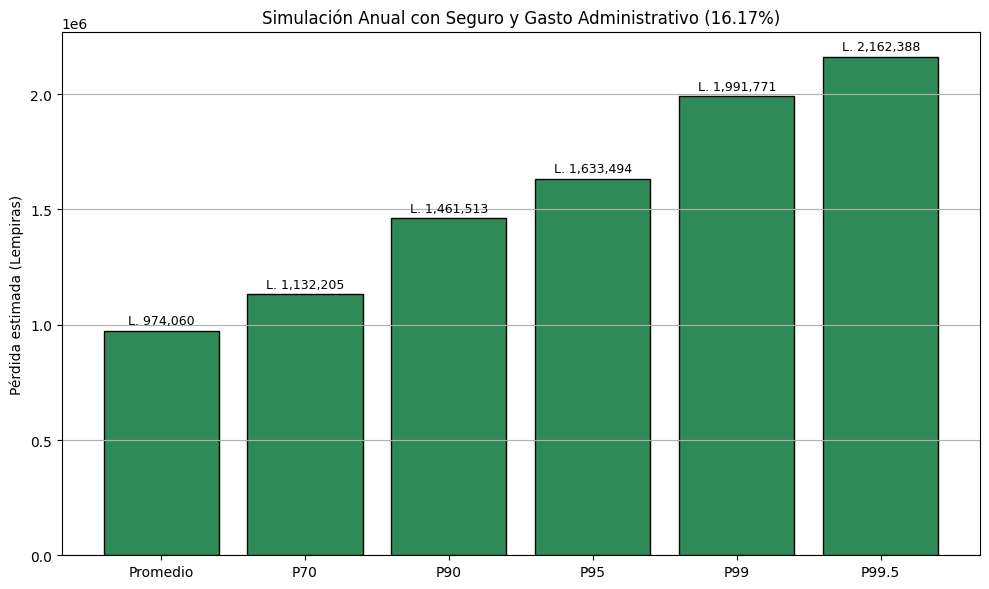

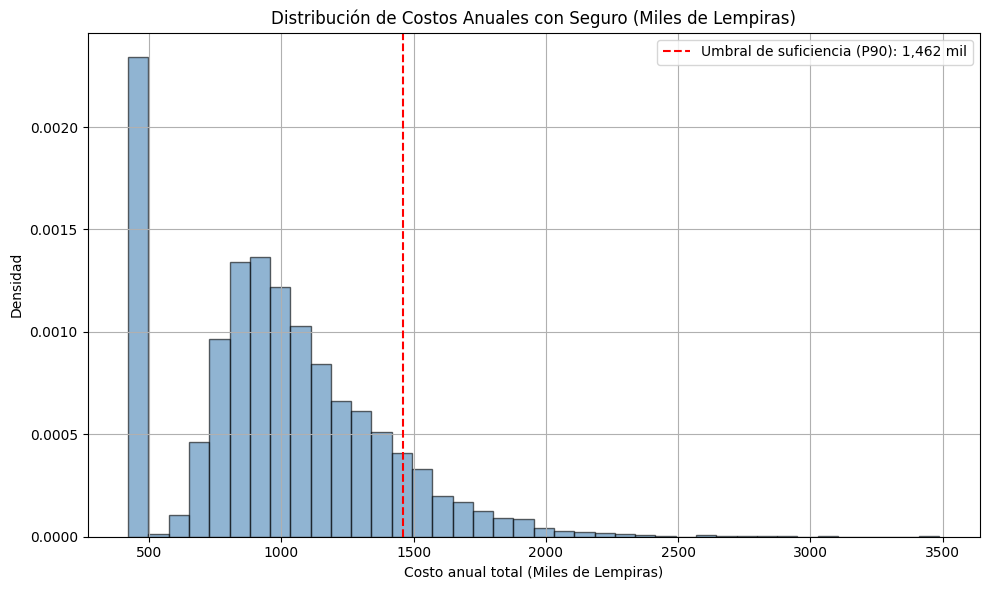

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Datos de familias activas por año y eventos por año
familias_por_ano = {

    2011:5632, 2012: 5765, 2013: 6263, 2014: 6511,
    2015: 6725, 2016: 6196, 2017: 6187,
    2018: 5525, 2019: 5308, 2020: 5172, 2021: 4948,
    2022: 4771, 2023: 4532, 2024: 4496
}
siniestros_menores = [12,28,26,11,21,13,18,17, 17, 23, 30, 14, 32, 46]
siniestros_mayores = [3,2,2,7,5,5,4,3, 5, 8, 5, 7, 11, 16]

familias_actuales = 5575
monto_asegurado_promedio = 205000
num_simulaciones = 10000
gasto_admin = 0.1617

# Parámetros del seguro
costo_seguro_anual = 420000
p_cubre = 0.18
monto_cubierto = 1500000

# Calcular frecuencias
frecuencia_menor = sum(siniestros_menores) / 13
frecuencia_mayor = sum(siniestros_mayores) / 13
lam_menor = frecuencia_menor
lam_mayor = frecuencia_mayor

# Leer base de datos
df = pd.read_excel("/content/Simulacion 2011-2024 Daños.xlsx")

def clean_currency(val):
    if isinstance(val, str):
        return float(val.replace('.', '').replace(',', '.').strip())
    return val

df['VALOR PAGADO'] = df['VALOR PAGADO INDEMNIZACIÓN'].apply(clean_currency)
df['TIPO_DAÑO'] = df['VALOR PAGADO'].apply(lambda x: 'Menor' if x <= 21000 else 'Mayor')
danios_menores = df[df['TIPO_DAÑO'] == 'Menor']['VALOR PAGADO'].dropna()
danios_mayores = df[df['TIPO_DAÑO'] == 'Mayor']['VALOR PAGADO'].dropna()

# Ajustar distribución Weibull para daños menores
params_menor = weibull_min.fit(danios_menores, floc=0)

# Simulación
total_losses = []
for _ in range(num_simulaciones):
    k_menor = np.random.poisson(lam_menor)
    k_mayor = np.random.poisson(lam_mayor)

    s_menor = weibull_min.rvs(*params_menor, size=k_menor).sum() if k_menor > 0 else 0
    s_mayor = np.random.choice(danios_mayores, size=k_mayor, replace=True).sum() if k_mayor > 0 else 0
    total_siniestros = (s_menor + s_mayor) * (1 + gasto_admin)

    # Aplicar seguro
    cubierto = monto_cubierto if np.random.rand() < p_cubre else 0
    total = total_siniestros - min(cubierto, total_siniestros) + costo_seguro_anual

    total_losses.append(total)

total_losses = np.array(total_losses)

# Estadísticas
percentiles = {
    "Promedio": np.mean(total_losses),
    "P70": np.percentile(total_losses, 70),
    "P90": np.percentile(total_losses, 90),
    "P95": np.percentile(total_losses, 95),
    "P99": np.percentile(total_losses, 99),
    "P99.5": np.percentile(total_losses, 99.5),
    "Desviación estándar": np.std(total_losses)
}

# Mostrar resultados
print("Resultados (incluyen gasto administrativo 16.17% + seguro):")
for key, val in percentiles.items():
    tasa = val / (familias_actuales * monto_asegurado_promedio) * 1000
    if "Desviación" in key:
        print(f"{key}: L. {val:,.2f}  |  Tasa Técnica (STD) ≈ {tasa:.3f} ‰")
    else:
        print(f"{key}: L. {val:,.2f}  |  Tasa Técnica ≈ {tasa:.3f} ‰")

# Gráfico de barras
plt.figure(figsize=(10, 6))
labels = list(percentiles.keys())[:-1]
values = [percentiles[key] for key in labels]
bars = plt.bar(labels, values, color='#2E8B57', edgecolor='black')
plt.ylabel("Pérdida estimada (Lempiras)")
plt.title("Simulación Anual con Seguro y Gasto Administrativo (16.17%)")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 15000, f"L. {height:,.0f}", ha='center', va='bottom', fontsize=9)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Gráfico de densidad con línea de suficiencia (percentil 90)
plt.figure(figsize=(10, 6))
plt.hist(total_losses / 1000, bins=40, density=True, alpha=0.6, color='steelblue', edgecolor='black')
p90_val = percentiles["P90"] / 1000
plt.axvline(p90_val, color='red', linestyle='--', label=f"Umbral de suficiencia (P90): {p90_val:,.0f} mil")
plt.title("Distribución de Costos Anuales con Seguro (Miles de Lempiras)")
plt.xlabel("Costo anual total (Miles de Lempiras)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Prueba de Simulacion


In [ ]:
tasa_experiencia = 0.00458
tasa_poblacional = 0.00723

tasa_combinada = 0.5 * tasa_experiencia + 0.5 * tasa_poblacional
# Resultado:
print(f"Tasa Combinada:{tasa_combinada:.6f}")


Tasa Combinada:0.005905


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Cargar datos
df = pd.read_excel("/content/Simulacion 2011-2016.xlsx")

# Filtrar valores positivos
severidades = df["VALOR PAGADO INDEMNIZACIÓN"]
severidades = severidades[severidades > 0].dropna()

# Ajustar distribución Gamma
a, loc, scale = stats.gamma.fit(severidades, floc=0)
gamma_dist = stats.gamma(a, loc=loc, scale=scale)

print(f"Parámetros Gamma -> a: {a:.4f}, loc: {loc:.4f}, scale: {scale:.4f}")

# Simulación
n_simulaciones = 10_000
tasa_riesgo =  0.005905
n_exposiciones = 5900  # Número de créditos

np.random.seed(42)
siniestros_simulados = np.random.poisson(lam=tasa_riesgo * n_exposiciones, size=n_simulaciones)

perdidas_totales = [
    gamma_dist.rvs(size=n).sum() if n > 0 else 0
    for n in siniestros_simulados
]

# Resultados
resultados = pd.DataFrame({
    "siniestros_simulados": siniestros_simulados,
    "perdida_total": perdidas_totales
})

# Estadísticas
stats_desc = resultados["perdida_total"].describe(percentiles=[0.65, 0.9, 0.95, 0.99])
print(stats_desc)

# Parámetros para tasa técnica
percentil_65 = stats_desc["65%"]
gastos_admin = 0.1637  # 16.37%

# Cálculo de tasa técnica
tasa_tecnica_lempiras = percentil_65 * (1 + gastos_admin)
tasa_tecnica_por_credito = tasa_tecnica_lempiras / n_exposiciones
tasa_tecnica_por_mil = tasa_tecnica_por_credito / (df["VALOR PAGADO INDEMNIZACIÓN"].mean()) * 1000

print(f"\n--- Tasa Técnica ---")
print(f"Percentil 65 de pérdida: L. {percentil_65:,.2f}")
print(f"Tasa técnica ajustada con gastos admin (Lempiras): L. {tasa_tecnica_lempiras:,.2f}")
print(f"Tasa técnica por crédito: L. {tasa_tecnica_por_credito:,.2f}")
print(f"Tasa técnica estimada en ‰ sobre el valor pagado promedio: {tasa_tecnica_por_mil:.3f} ‰")


Parámetros Gamma -> a: 1.1583, loc: 0.0000, scale: 43455.6820
count    1.000000e+04
mean     1.754580e+06
std      4.023614e+05
min      5.851209e+05
50%      1.734870e+06
65%      1.890236e+06
90%      2.282153e+06
95%      2.453920e+06
99%      2.779268e+06
max      3.381305e+06
Name: perdida_total, dtype: float64

--- Tasa Técnica ---
Percentil 65 de pérdida: L. 1,890,235.71
Tasa técnica ajustada con gastos admin (Lempiras): L. 2,199,667.30
Tasa técnica por crédito: L. 372.82
Tasa técnica estimada en ‰ sobre el valor pagado promedio: 7.407 ‰


#### Simulacion 2018-2024

In [ ]:
tasa_experiencia = 0.00396
tasa_poblacional = 0.00648

tasa_combinada = 0.5 * tasa_experiencia + 0.5 * tasa_poblacional
# Resultado:
print(f"Tasa Combinada:{tasa_combinada:.6f}")


Tasa Combinada: 0.005250


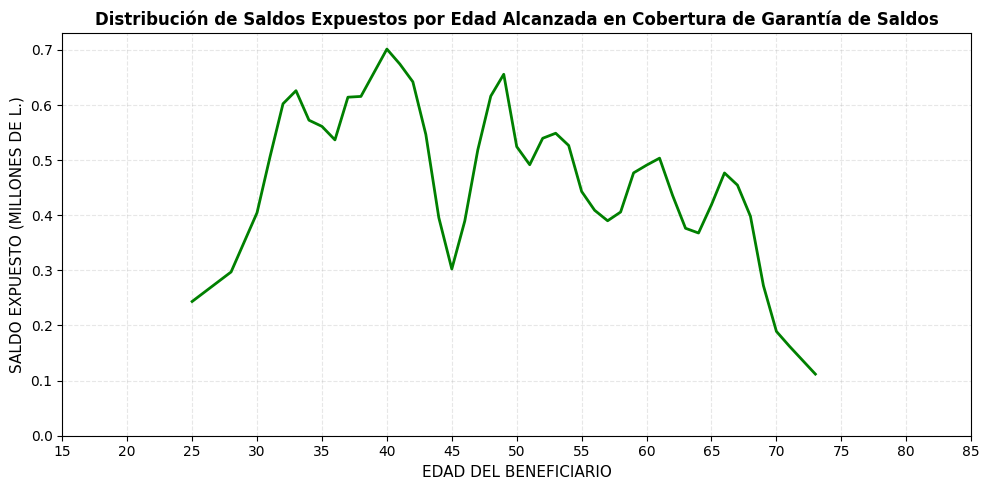

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Cargar datos
df = pd.read_excel("Simulacion Saldos.xlsx")

# Filtrar edades y valores válidos
df = df[(df["EDAD AL OCURRIR EL SINIESTRO"] >= 15) & (df["EDAD AL OCURRIR EL SINIESTRO"] <= 85) & (df["VALOR INSCRITO"] > 0)].copy()

# Agrupar por edad y sumar los saldos
edad_saldos = df.groupby("EDAD AL OCURRIR EL SINIESTRO")["VALOR INSCRITO"].sum().reset_index()
edad_saldos["VALOR_INSCRITO_MILLONES"] = edad_saldos["VALOR INSCRITO"] / 1_000_000

# Aplicar suavizado LOWESS
suavizado = lowess(
    endog=edad_saldos["VALOR_INSCRITO_MILLONES"],
    exog=edad_saldos["EDAD AL OCURRIR EL SINIESTRO"],
    frac=0.15
)

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.plot(suavizado[:, 0], suavizado[:, 1], color="green", linewidth=2)

# Personalizar estilo
plt.title("Distribución de Saldos Expuestos por Edad Alcanzada en Cobertura de Garantía de Saldos", fontsize=12, fontweight='bold')
plt.xlabel("EDAD DEL BENEFICIARIO", fontsize=11)
plt.ylabel("SALDO EXPUESTO (MILLONES DE L.)", fontsize=11)
plt.xlim(15, 85)
plt.ylim(0)
plt.grid(True, linestyle="--", alpha=0.3)
plt.xticks(np.arange(15, 90, 5))
plt.tight_layout()

# Mostrar
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Cargar datos
df = pd.read_excel("Simulacion Saldos.xlsx")

# Filtrar valores positivos
severidades = df["VALOR PAGADO INDEMNIZACIÓN"]
severidades = severidades[severidades > 0].dropna()

# Ajustar distribución Gamma
a, loc, scale = stats.gamma.fit(severidades, floc=0)
gamma_dist = stats.gamma(a, loc=loc, scale=scale)

print(f"Parámetros Gamma -> a: {a:.4f}, loc: {loc:.4f}, scale: {scale:.4f}")

# Simulación
n_simulaciones = 10_000
tasa_riesgo =  0.005250  # 5.250‰
n_exposiciones = 4496  # Número de créditos

np.random.seed(42)
siniestros_simulados = np.random.poisson(lam=tasa_riesgo * n_exposiciones, size=n_simulaciones)

perdidas_totales = [
    gamma_dist.rvs(size=n).sum() if n > 0 else 0
    for n in siniestros_simulados
]

# Resultados
resultados = pd.DataFrame({
    "siniestros_simulados": siniestros_simulados,
    "perdida_total": perdidas_totales
})

# Estadísticas
stats_desc = resultados["perdida_total"].describe(percentiles=[0.65, 0.9, 0.95, 0.99])
print(stats_desc)

# Parámetros para tasa técnica
percentil_65 = stats_desc["65%"]
gastos_admin = 0.1637  # 16.37%

# Cálculo de tasa técnica
tasa_tecnica_lempiras = percentil_65 * (1 + gastos_admin)
tasa_tecnica_por_credito = tasa_tecnica_lempiras / n_exposiciones
tasa_tecnica_por_mil = tasa_tecnica_por_credito / (df["VALOR PAGADO INDEMNIZACIÓN"].mean()) * 1000

print(f"\n--- Tasa Técnica ---")
print(f"Percentil 65 de pérdida: L. {percentil_65:,.2f}")
print(f"Tasa técnica ajustada con gastos admin (Lempiras): L. {tasa_tecnica_lempiras:,.2f}")
print(f"Tasa técnica por crédito: L. {tasa_tecnica_por_credito:,.2f}")
print(f"Tasa técnica estimada en ‰ sobre el valor pagado promedio: {tasa_tecnica_por_mil:.3f} ‰")


Parámetros Gamma -> a: 1.5145, loc: 0.0000, scale: 62299.6259
count    1.000000e+04
mean     2.236708e+06
std      5.867340e+05
min      6.178738e+05
50%      2.205381e+06
65%      2.432021e+06
90%      3.010224e+06
95%      3.255094e+06
99%      3.774536e+06
max      5.016596e+06
Name: perdida_total, dtype: float64

--- Tasa Técnica ---
Percentil 65 de pérdida: L. 2,432,020.55
Tasa técnica ajustada con gastos admin (Lempiras): L. 2,830,142.32
Tasa técnica por crédito: L. 629.48
Tasa técnica estimada en ‰ sobre el valor pagado promedio: 6.762 ‰


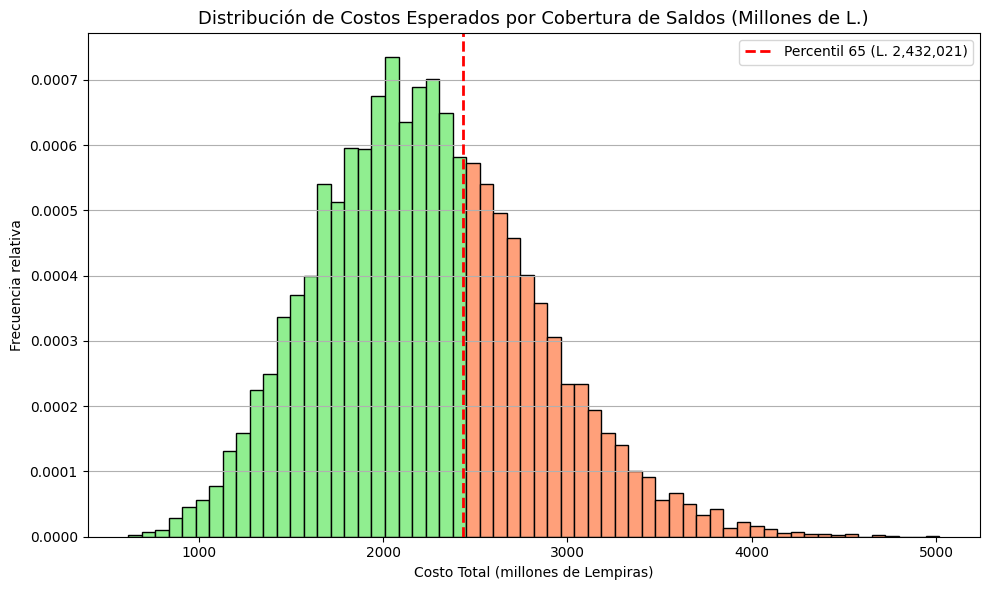

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Cargar datos
df = pd.read_excel("Simulacion Saldos.xlsx")

# Filtrar valores positivos
severidades = df["VALOR PAGADO INDEMNIZACIÓN"]
severidades = severidades[severidades > 0].dropna()

# Ajustar distribución Gamma
a, loc, scale = stats.gamma.fit(severidades, floc=0)
gamma_dist = stats.gamma(a, loc=loc, scale=scale)

# Simulación
n_simulaciones = 10_000
tasa_riesgo = 0.005250
n_exposiciones = 4496

np.random.seed(42)
siniestros_simulados = np.random.poisson(lam=tasa_riesgo * n_exposiciones, size=n_simulaciones)

perdidas_totales = [
    gamma_dist.rvs(size=n).sum() if n > 0 else 0
    for n in siniestros_simulados
]

# Percentil 65 obtenido antes
percentil_65 = 2_432_020.55  # Lempiras
umbral = percentil_65 / 1000  # en miles

# === Gráfico corregido ===
losses_k = np.array(perdidas_totales) / 1000  # Convertir a miles

fig, ax = plt.subplots(figsize=(10, 6))
counts, bins, patches = ax.hist(losses_k, bins=60, density=True, edgecolor='black')

# Colorear barras según umbral
for patch, bin_left in zip(patches, bins[:-1]):
    patch.set_facecolor('lightgreen' if bin_left <= umbral else 'lightsalmon')

# Línea del umbral (percentil 65)
plt.axvline(umbral, color='red', linestyle='--', linewidth=2,
            label=f'Percentil 65 (L. {percentil_65:,.0f})')

# Estética del gráfico
plt.title("Distribución de Costos Esperados por Cobertura de Saldos (Millones de L.)", fontsize=13)
plt.xlabel("Costo Total (millones de Lempiras)")
plt.ylabel("Frecuencia relativa")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Analisis Historico Base de Saldos

In [ ]:
tasa_experiencia = 0.00376
tasa_poblacional = 0.00673

tasa_combinada = 0.5 * tasa_experiencia + 0.5 * tasa_poblacional
# Resultado:
print(f"Tasa Combinada: {tasa_combinada:.6f}")

Tasa Combinada: 0.005245


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Cargar datos
df = pd.read_excel("Simulacion_ajustada_2024.xlsx")

# Filtrar valores positivos
severidades = df["VALOR PAGADO AJUSTADO"]
severidades = severidades[severidades > 0].dropna()

# Ajustar distribución Gamma
a, loc, scale = stats.gamma.fit(severidades, floc=0)
gamma_dist = stats.gamma(a, loc=loc, scale=scale)

# Simulación
n_simulaciones = 10_000
tasa_riesgo =  0.00579
n_exposiciones = 5500

np.random.seed(42)
siniestros_simulados = np.random.poisson(lam=tasa_riesgo * n_exposiciones, size=n_simulaciones)

perdidas_totales = [
    gamma_dist.rvs(size=n).sum() if n > 0 else 0
    for n in siniestros_simulados
]

# Resultados
resultados = pd.DataFrame({
    "siniestros_simulados": siniestros_simulados,
    "perdida_total": perdidas_totales
})

# Estadísticas
mean = resultados["perdida_total"].mean()
std = resultados["perdida_total"].std()
p70 = resultados["perdida_total"].quantile(0.70)
p90 = resultados["perdida_total"].quantile(0.90)
p95 = resultados["perdida_total"].quantile(0.95)
p99 = resultados["perdida_total"].quantile(0.99)
p995 = resultados["perdida_total"].quantile(0.995)

# Cálculo de tasas técnicas
gastos_admin = 0.1617
valor_promedio_credito = 145000

def calcular_tasa(val):
    return ((val * (1 + gastos_admin)) / n_exposiciones) / valor_promedio_credito * 1000

print("Resultados (incluyen gasto administrativo 16.17% + seguro):")
print(f"Promedio: L. {mean:,.2f}  |  Tasa Técnica ≈ {calcular_tasa(mean):.3f} ‰")
print(f"P70: L. {p70:,.2f}  |  Tasa Técnica ≈ {calcular_tasa(p70):.3f} ‰")
print(f"P90: L. {p90:,.2f}  |  Tasa Técnica ≈ {calcular_tasa(p90):.3f} ‰")
print(f"P95: L. {p95:,.2f}  |  Tasa Técnica ≈ {calcular_tasa(p95):.3f} ‰")
print(f"P99: L. {p99:,.2f}  |  Tasa Técnica ≈ {calcular_tasa(p99):.3f} ‰")
print(f"P99.5: L. {p995:,.2f}  |  Tasa Técnica ≈ {calcular_tasa(p995):.3f} ‰")
print(f"Desviación estándar: L. {std:,.2f}  |  Tasa Técnica (STD) ≈ {calcular_tasa(std):.3f} ‰")


Resultados (incluyen gasto administrativo 16.17% + seguro):
Promedio: L. 2,923,827.92  |  Tasa Técnica ≈ 4.259 ‰
P70: L. 3,260,431.49  |  Tasa Técnica ≈ 4.749 ‰
P90: L. 3,843,233.42  |  Tasa Técnica ≈ 5.598 ‰
P95: L. 4,145,883.32  |  Tasa Técnica ≈ 6.039 ‰
P99: L. 4,697,243.46  |  Tasa Técnica ≈ 6.842 ‰
P99.5: L. 4,865,528.49  |  Tasa Técnica ≈ 7.088 ‰
Desviación estándar: L. 694,886.04  |  Tasa Técnica (STD) ≈ 1.012 ‰


### Analisis de riesgo consolidado

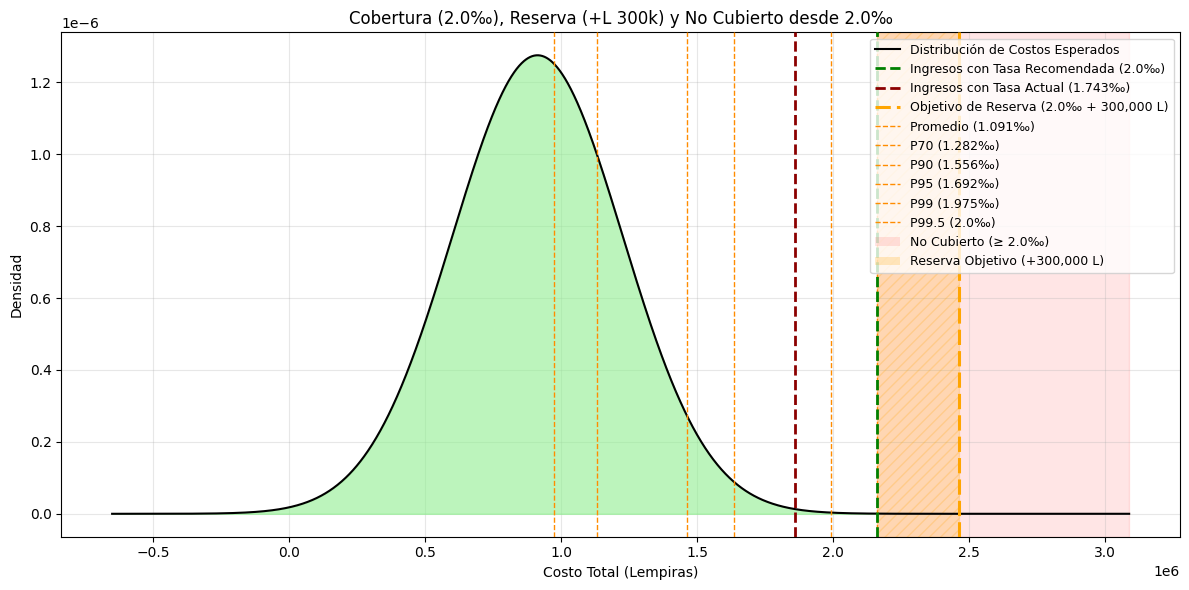

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.patches as mpatches

# ---------------------------
# Parámetros simulados
# ---------------------------
media = 912_736.50
std_dev = 312_823.32

# Ingresos según tasas
ingresos_actuales = 1_857_959.08          # ~1.743‰
ingresos_recomendados = 2_162_388.02       # 2.0‰ ≈ P99.5

# Escenarios
escenarios = {
    "Promedio (1.091‰)": 974_059.70,
    "P70 (1.282‰)": 1_132_205.17,
    "P90 (1.556‰)": 1_461_512.96,
    "P95 (1.692‰)": 1_633_494.09,
    "P99 (1.975‰)": 1_991_770.63,
    "P99.5 (2.0‰)": ingresos_recomendados
}

# Reserva objetivo (+300k sobre 2.0‰)
reserva_monto = 300_000
valor_objetivo_reserva = ingresos_recomendados + reserva_monto

# ---------------------------
# Rango extendido para ver la cola
# ---------------------------
x_min = media - 5 * std_dev
x_max = max(media + 5 * std_dev, valor_objetivo_reserva + 2 * std_dev)
x = np.linspace(x_min, x_max, 2500)
y = stats.norm.pdf(x, loc=media, scale=std_dev)

# ---------------------------
# Secciones bajo la curva
# ---------------------------
mask_cubierto = (x <= ingresos_recomendados)
x_cubierto, y_cubierto = x[mask_cubierto], y[mask_cubierto]

# ---------------------------
# Gráfico
# ---------------------------
fig, ax = plt.subplots(figsize=(12, 6))

# (A) BANDAS VISIBLES A PARTIR DE 2.0‰  <<-- aseguran que el rojo SIEMPRE se vea
# Rojo: todo lo no cubierto desde 2.0‰ hacia la derecha
ax.axvspan(ingresos_recomendados, x_max, facecolor="red", alpha=0.10,
           hatch=None, edgecolor="red", zorder=1)
# Naranja: sub-banda de reserva dentro del rojo (2.0‰ -> 2.0‰ + 300k)
ax.axvspan(ingresos_recomendados, valor_objetivo_reserva, facecolor="orange",
           alpha=0.22, hatch="///", edgecolor="orange", zorder=2)

# (B) Curva y área verde bajo la curva (hasta 2.0‰)
ax.fill_between(x_cubierto, y_cubierto, color="lightgreen", alpha=0.6, zorder=3)
sns.lineplot(x=x, y=y, color="black", label="Distribución de Costos Esperados", ax=ax, zorder=4)

# Líneas de referencia
ax.axvline(ingresos_recomendados, color="green", linestyle="--", linewidth=2,
           label="Ingresos con Tasa Recomendada (2.0‰)", zorder=5)
ax.axvline(ingresos_actuales, color="darkred", linestyle="--", linewidth=2,
           label="Ingresos con Tasa Actual (1.743‰)", zorder=5)
ax.axvline(valor_objetivo_reserva, color="orange", linestyle=(0, (5,2)), linewidth=2.2,
           label=f"Objetivo de Reserva (2.0‰ + {reserva_monto:,.0f} L)", zorder=5)

for label, value in escenarios.items():
    ax.axvline(value, linestyle="--", color="darkorange", linewidth=1, label=label, zorder=4)

# Leyenda (agrego proxies para las bandas)
patch_rojo = mpatches.Patch(facecolor="red", alpha=0.10, label="No Cubierto (≥ 2.0‰)")
patch_naranja = mpatches.Patch(facecolor="orange", alpha=0.22, label=f"Reserva Objetivo (+{reserva_monto:,.0f} L)")
handles, labels = ax.get_legend_handles_labels()
handles.extend([patch_rojo, patch_naranja])
ax.legend(handles=handles, loc="upper right", fontsize=9)

ax.set_title("Cobertura (2.0‰), Reserva (+L 300k) y No Cubierto desde 2.0‰")
ax.set_xlabel("Costo Total (Lempiras)")
ax.set_ylabel("Densidad")
ax.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()


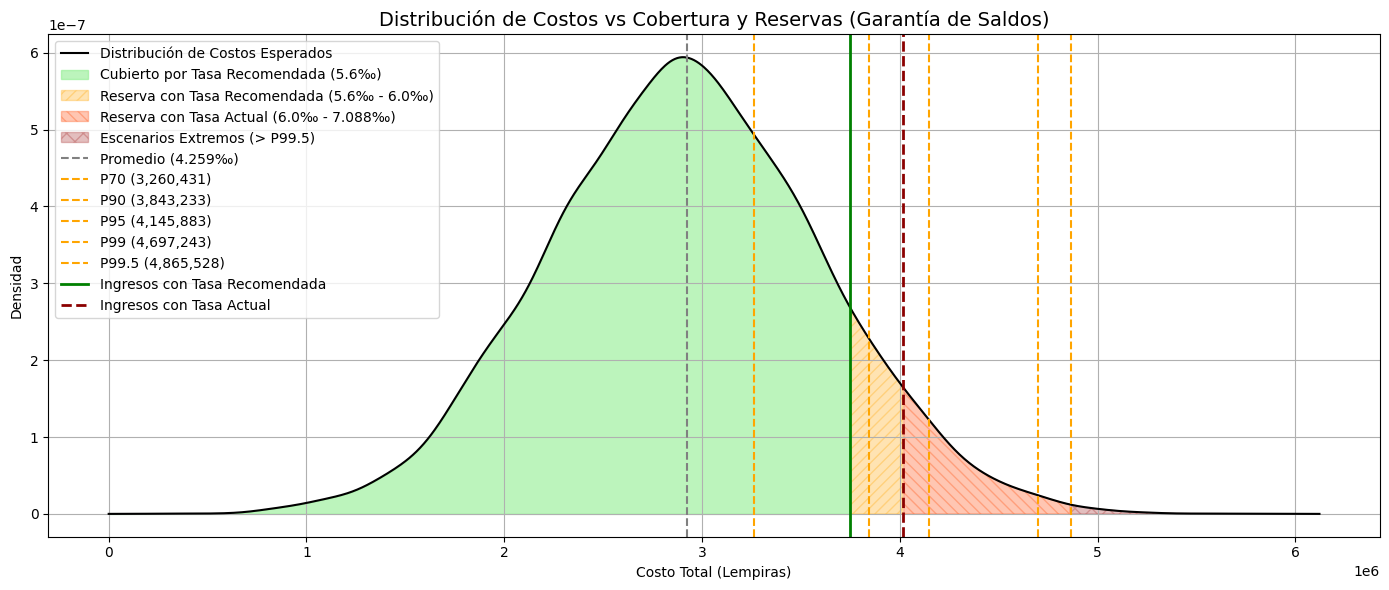

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Parámetros dados
simulaciones = 10_000
promedio = 2923827.92
std_dev = 694886.04

# Valores de percentiles e ingresos
percentiles = {
    "P70": 3260431.49,
    "P90": 3843233.42,
    "P95": 4145883.32,
    "P99": 4697243.46,
    "P99.5": 4865528.49,
}
ingreso_recomendada = 3746800.09
ingreso_actual = 4014428.67

# Generar simulaciones normales (aproximación)
np.random.seed(0)
simulaciones_costos = np.random.normal(loc=promedio, scale=std_dev, size=simulaciones)
simulaciones_costos = simulaciones_costos[simulaciones_costos > 0]

# KDE para suavizar la distribución
kde = gaussian_kde(simulaciones_costos)
x_vals = np.linspace(0, max(simulaciones_costos)*1.1, 1000)
y_vals = kde(x_vals)

# Iniciar el gráfico
plt.figure(figsize=(14, 6))
plt.plot(x_vals, y_vals, color='black', label="Distribución de Costos Esperados")

# Área cubierta por tasa recomendada
plt.fill_between(x_vals, 0, y_vals,
                 where=(x_vals <= ingreso_recomendada),
                 color='lightgreen', alpha=0.6,
                 label=f'Cubierto por Tasa Recomendada (5.6‰)')

# Área entre tasa recomendada y tasa actual
plt.fill_between(x_vals, 0, y_vals,
                 where=(x_vals > ingreso_recomendada) & (x_vals <= ingreso_actual),
                 color='orange', alpha=0.3, hatch='///',
                 label=f'Reserva con Tasa Recomendada (5.6‰ - 6.0‰)')

# Área entre tasa actual y percentil 99.5
plt.fill_between(x_vals, 0, y_vals,
                 where=(x_vals > ingreso_actual) & (x_vals <= percentiles["P99.5"]),
                 color='orangered', alpha=0.3, hatch='\\\\\\',
                 label=f'Reserva con Tasa Actual (6.0‰ - 7.088‰)')

# Área más allá del P99.5
plt.fill_between(x_vals, 0, y_vals,
                 where=(x_vals > percentiles["P99.5"]),
                 color='brown', alpha=0.3, hatch='xx',
                 label='Escenarios Extremos (> P99.5)')

# Líneas verticales de referencia
plt.axvline(promedio, color='gray', linestyle='--', label="Promedio (4.259‰)")
for label, val in percentiles.items():
    plt.axvline(val, color='orange', linestyle='--', label=f"{label} ({val:,.0f})")

plt.axvline(ingreso_recomendada, color='green', linestyle='-', linewidth=2, label="Ingresos con Tasa Recomendada")
plt.axvline(ingreso_actual, color='darkred', linestyle='--', linewidth=2, label="Ingresos con Tasa Actual")

# Estética
plt.title("Distribución de Costos vs Cobertura y Reservas (Garantía de Saldos)", fontsize=14)
plt.xlabel("Costo Total (Lempiras)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


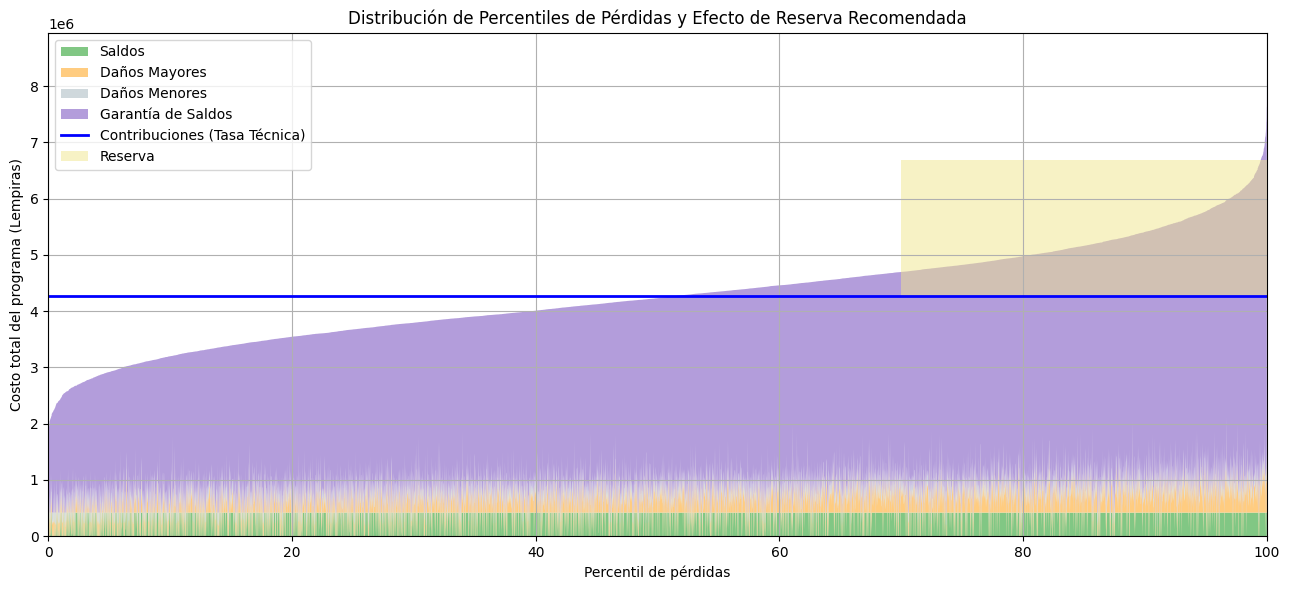

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, gamma

# -------------------------------
# 1. Simulación de COBERTURA DE DAÑOS
# -------------------------------

# Parámetros
num_simulaciones = 10000
gasto_admin = 0.1617
costo_seguro_anual = 420000
p_cubre = 0.18
monto_cubierto = 1500000

familias_actuales = 5575
monto_asegurado_promedio = 150000

# Datos observados
siniestros_menores = [12,28,26,11,21,13,18,16,16,18,27,14,29,22]
siniestros_mayores = [3,2,2,7,5,5,4,4,6,13,8,7,14,7]
frecuencia_menor = sum(siniestros_menores) / len(siniestros_menores)
frecuencia_mayor = sum(siniestros_mayores) / len(siniestros_mayores)

lam_menor = frecuencia_menor
lam_mayor = frecuencia_mayor

# Leer base de daños
df_danos = pd.read_excel("Simulacion 2011-2024 Daños.xlsx")

def clean_currency(val):
    if isinstance(val, str):
        return float(val.replace('.', '').replace(',', '.').strip())
    return val

df_danos['VALOR PAGADO'] = df_danos['VALOR PAGADO INDEMNIZACIÓN'].apply(clean_currency)
df_danos['TIPO_DAÑO'] = df_danos['VALOR PAGADO'].apply(lambda x: 'Menor' if x <= 21000 else 'Mayor')
danios_menores = df_danos[df_danos['TIPO_DAÑO'] == 'Menor']['VALOR PAGADO'].dropna()
danios_mayores = df_danos[df_danos['TIPO_DAÑO'] == 'Mayor']['VALOR PAGADO'].dropna()

# Ajustar distribución Weibull para daños menores
params_menor = weibull_min.fit(danios_menores, floc=0)

# Simulación de cobertura de daños
danios_menores_sim, danios_mayores_sim, saldos_sim, total_danos = [], [], [], []

for _ in range(num_simulaciones):
    k_menor = np.random.poisson(lam_menor)
    k_mayor = np.random.poisson(lam_mayor)

    s_menor = weibull_min.rvs(*params_menor, size=k_menor).sum() if k_menor > 0 else 0
    s_mayor = np.random.choice(danios_mayores, size=k_mayor, replace=True).sum() if k_mayor > 0 else 0
    total_siniestros = (s_menor + s_mayor) * (1 + gasto_admin)

    cubierto = monto_cubierto if np.random.rand() < p_cubre else 0
    total = total_siniestros - min(cubierto, total_siniestros) + costo_seguro_anual

    danios_menores_sim.append(s_menor * (1 + gasto_admin))
    danios_mayores_sim.append(s_mayor * (1 + gasto_admin))
    saldos_sim.append(total - danios_menores_sim[-1] - danios_mayores_sim[-1])
    total_danos.append(total)

# -------------------------------
# 2. Simulación de GARANTÍA DE SALDOS
# -------------------------------

df_saldos = pd.read_excel("Simulacion_ajustada_2024.xlsx")
severidades = df_saldos["VALOR PAGADO AJUSTADO"]
severidades = severidades[severidades > 0].dropna()

a, loc, scale = gamma.fit(severidades, floc=0)
gamma_dist = gamma(a, loc=loc, scale=scale)

tasa_riesgo = 0.00579
n_exposiciones = 5500

np.random.seed(42)
siniestros_simulados = np.random.poisson(lam=tasa_riesgo * n_exposiciones, size=num_simulaciones)
garantia_saldos = [
    gamma_dist.rvs(size=n).sum() * (1 + gasto_admin) if n > 0 else 0
    for n in siniestros_simulados
]

# -------------------------------
# 3. Integración y gráfico final
# -------------------------------

df_plot = pd.DataFrame({
    "Saldos": saldos_sim,
    "Daños Mayores": danios_mayores_sim,
    "Daños Menores": danios_menores_sim,
    "Garantía de Saldos": garantia_saldos
})

df_plot["Total"] = df_plot[["Saldos", "Daños Mayores", "Daños Menores", "Garantía de Saldos"]].sum(axis=1)
df_plot = df_plot.sort_values("Total").reset_index(drop=True)

# Línea de contribuciones (promedio total del programa)
contribuciones_linea = df_plot["Total"].mean()
df_plot["No-Reservado"] = np.maximum(df_plot["Total"] - contribuciones_linea, 0)
p_995_val = np.percentile(df_plot["Total"], 99.5)

# Gráfico tipo Gráfico 8
plt.figure(figsize=(13, 6))
plt.stackplot(
    np.linspace(0, 100, num_simulaciones),
    df_plot["Saldos"],
    df_plot["Daños Mayores"],
    df_plot["Daños Menores"],
    df_plot["Garantía de Saldos"],
    labels=["Saldos", "Daños Mayores", "Daños Menores", "Garantía de Saldos"],
    colors=["#81c784", "#ffcc80", "#cfd8dc", "#b39ddb"]
)

plt.axhline(y=contribuciones_linea, color='blue', linestyle='-', linewidth=2, label='Contribuciones (Tasa Técnica)')
plt.axhspan(contribuciones_linea, p_995_val, xmin=0.7, xmax=1.0, facecolor='khaki', alpha=0.5, label='Reserva')

# Estética
plt.title("Distribución de Percentiles de Pérdidas y Efecto de Reserva Recomendada")
plt.xlabel("Percentil de pérdidas")
plt.ylabel("Costo total del programa (Lempiras)")
plt.xlim(0, 100)
plt.ylim(0, df_plot["Total"].max() * 1.1)
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


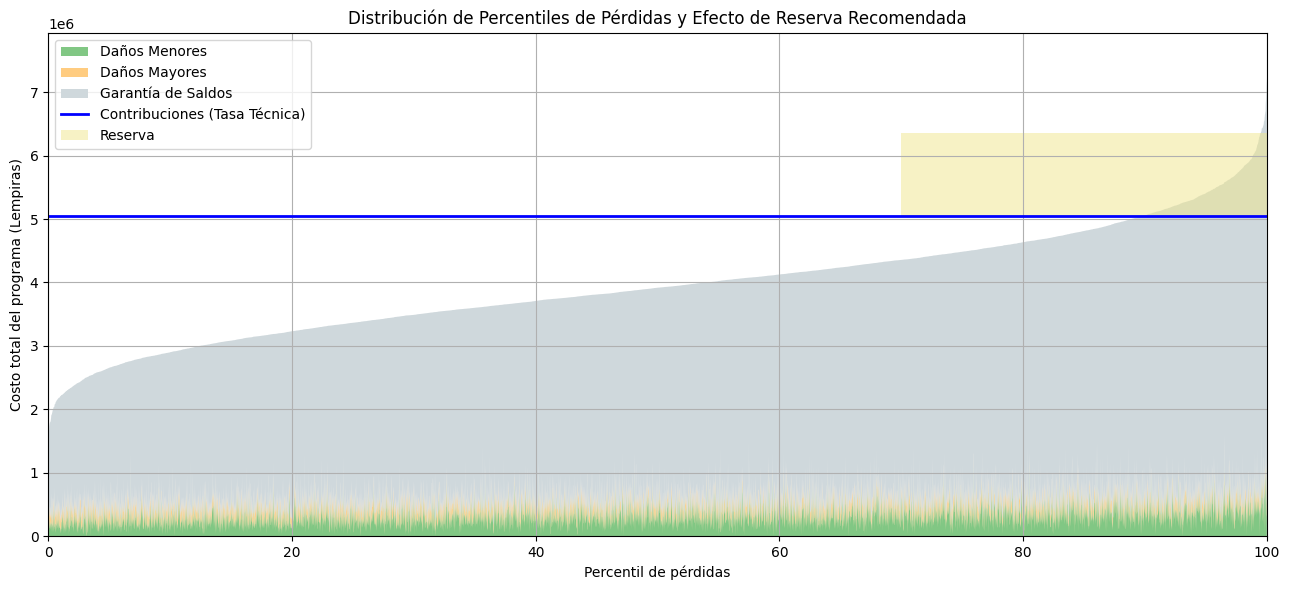

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, gamma

# Parámetros
num_simulaciones = 10000
gasto_admin = 0.1617
costo_seguro_anual = 420000
p_cubre = 0.18
monto_cubierto = 1500000

familias_actuales = 5575
monto_asegurado_promedio = 150000

# Datos observados
siniestros_menores = [12,28,26,11,21,13,18,16,16,18,27,14,29,22]
siniestros_mayores = [3,2,2,7,5,5,4,4,6,13,8,7,14,7]
frecuencia_menor = sum(siniestros_menores) / len(siniestros_menores)
frecuencia_mayor = sum(siniestros_mayores) / len(siniestros_mayores)

lam_menor = frecuencia_menor
lam_mayor = frecuencia_mayor

# Leer base de daños
df_danos = pd.read_excel("Simulacion 2011-2024 Daños.xlsx")

def clean_currency(val):
    if isinstance(val, str):
        return float(val.replace('.', '').replace(',', '.').strip())
    return val

df_danos['VALOR PAGADO'] = df_danos['VALOR PAGADO INDEMNIZACIÓN'].apply(clean_currency)
df_danos['TIPO_DAÑO'] = df_danos['VALOR PAGADO'].apply(lambda x: 'Menor' if x <= 21000 else 'Mayor')
danios_menores = df_danos[df_danos['TIPO_DAÑO'] == 'Menor']['VALOR PAGADO'].dropna()
danios_mayores = df_danos[df_danos['TIPO_DAÑO'] == 'Mayor']['VALOR PAGADO'].dropna()

# Ajustar distribución Weibull para daños menores
params_menor = weibull_min.fit(danios_menores, floc=0)

# Simulación de cobertura de daños
danios_menores_sim, danios_mayores_sim, saldos_sim, total_danos = [], [], [], []

for _ in range(num_simulaciones):
    k_menor = np.random.poisson(lam_menor)
    k_mayor = np.random.poisson(lam_mayor)

    s_menor = weibull_min.rvs(*params_menor, size=k_menor).sum() if k_menor > 0 else 0
    s_mayor = np.random.choice(danios_mayores, size=k_mayor, replace=True).sum() if k_mayor > 0 else 0
    total_siniestros = (s_menor + s_mayor) * (1 + gasto_admin)

    cubierto = monto_cubierto if np.random.rand() < p_cubre else 0
    total = total_siniestros - min(cubierto, total_siniestros) + costo_seguro_anual

    danios_menores_sim.append(s_menor * (1 + gasto_admin))
    danios_mayores_sim.append(s_mayor * (1 + gasto_admin))
    saldos_sim.append(total - danios_menores_sim[-1] - danios_mayores_sim[-1])
    total_danos.append(total)

# -------------------------------
# 2. Simulación de GARANTÍA DE SALDOS
# -------------------------------

df_saldos = pd.read_excel("Simulacion_ajustada_2024.xlsx")
severidades = df_saldos["VALOR PAGADO AJUSTADO"]
severidades = severidades[severidades > 0].dropna()

a, loc, scale = gamma.fit(severidades, floc=0)
gamma_dist = gamma(a, loc=loc, scale=scale)

tasa_riesgo = 0.00579
n_exposiciones = 5500

np.random.seed(42)
siniestros_simulados = np.random.poisson(lam=tasa_riesgo * n_exposiciones, size=num_simulaciones)
garantia_saldos = [
    gamma_dist.rvs(size=n).sum() * (1 + gasto_admin) if n > 0 else 0
    for n in siniestros_simulados
]

# -------------------------------
# 3. Integración y gráfico final
# -------------------------------

df_plot = pd.DataFrame({
    "Daños Mayores": danios_mayores_sim,
    "Daños Menores": danios_menores_sim,
    "Garantía de Saldos": garantia_saldos
})

df_plot["Total"] = df_plot[["Daños Mayores", "Daños Menores", "Garantía de Saldos"]].sum(axis=1)
df_plot = df_plot.sort_values("Total").reset_index(drop=True)

# Línea de contribuciones corregida: tasa técnica recomendada (actualizada a 5,045,353.42)
contribuciones_linea = 5045353.42
df_plot["No-Reservado"] = np.maximum(df_plot["Total"] - contribuciones_linea, 0)
p_995_val = np.percentile(df_plot["Total"], 99.5)

# Gráfico tipo Gráfico 8
plt.figure(figsize=(13, 6))
plt.stackplot(
    np.linspace(0, 100, num_simulaciones),
    df_plot["Daños Mayores"],
    df_plot["Daños Menores"],
    df_plot["Garantía de Saldos"],
    labels=[ "Daños Menores", "Daños Mayores", "Garantía de Saldos"],
    colors=["#81c784", "#ffcc80", "#cfd8dc", "#b39ddb"]
)

plt.axhline(y=contribuciones_linea, color='blue', linestyle='-', linewidth=2, label='Contribuciones (Tasa Técnica)')
plt.axhspan(contribuciones_linea, p_995_val, xmin=0.7, xmax=1.0, facecolor='khaki', alpha=0.5, label='Reserva')

# Estética
plt.title("Distribución de Percentiles de Pérdidas y Efecto de Reserva Recomendada")
plt.xlabel("Percentil de pérdidas")
plt.ylabel("Costo total del programa (Lempiras)")
plt.xlim(0, 100)
plt.ylim(0, df_plot["Total"].max() * 1.1)
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()
